## 1.1 : what is Nerwork intrusion ?

A <b>network intrusion</b> is any unauthorized activity on a computer network.  
The  unauthorized activities or abnormal network activities threaten users' privacy and potentially damage the function and infrastructure of the whole network

##### Intrusion detector : 
The Intrusion detection system will detect network intrusions protects a computer network from unauthorized users, including perhaps insiders

## 1.2 : Problem Statement

 The intrusion detector learning task is to build a predictive model (i.e. a classifier) capable of distinguishing between bad connections, called intrusions or attacks, and good normal connections.

<h2>1.3 : Source/Useful Links </h2>

The data set used here is NSL KDD (new version of kdd-cup99)

The 1998 DARPA Intrusion Detection Evaluation Program was prepared and managed by MIT Lincoln Labs. The objective was to survey and evaluate research in intrusion detection.  A standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment, was provided.  The 1999 KDD intrusion detection contest uses a version of this dataset.

NSL_KDD which is the new version of kdd-cup99 has the following advantages:

- No redundant records in the train set, so the classifier will not produce any biased result  
-  No duplicate record in the test set which have better reduction rates.  
- The number of selected records from each difficult level group is inversely proportional to the percentage of records in the original KDD data set  



In this dataset Attacks fall into four main categories:   

* DOS: denial-of-service, e.g. syn flood.  
* R2L: unauthorized access from a remote machine, e.g. guessing password.  
* U2R:  unauthorized access to local superuser (root) privileges, e.g., various buffer overflow attacks.  
* probing: surveillance and other probing, e.g., port scanning.  


Source of the dataset : https://www.unb.ca/cic/datasets/nsl.html

<h2>1.4. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability partially is important.
* Intrusion Detection should not take hours.It should fininsh in a few seconds or a minute.
* It should detect the network intrusion as well as possible.

# 2 : Machine learning problem formulation

## 2.1 : Data

### 2.1.1 : Data Overview

Source of the data : https://www.unb.ca/cic/datasets/nsl.html

we have 2 dataset 
 - Train data : It has 125973 datapoints with 42 features 
 - Test data  : it has 22544 datapoints with 42 features 
 
here is a detailed description about the dataset
http://kdd.ics.uci.edu/databases/kddcup99/task.html

## example data point

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<pre>
There are 2 type of class we need to classify attack or normal -> This is a binary classification task
</pre>

<h3>2.2.2. Performance Metric</h3>

<pre>
some of the research papers and solution have been used this metric 
* AUC 
* f1 score
lets use this metric also to get some interpretability
* Binary Confusion matrix
* Detection rate - It it nothing but the recall
</pre>

<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<pre>
Objective : Given a datapoint classfy is it an attack or not -> Binary Classification

Constraints:
    1. reasonable latency
    2. Interpritability 
</pre>

### 2.2.4 Train Test Datasets
we already have train and test data set from the source.

<h1>3. Exploratory Data Analysis</h1>

<h2>3.1 Reading the data</h2>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.utils import resample
import six
import sys
from sklearn.ensemble import StackingClassifier

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# to display all column of datapoints
pd.set_option('display.max_columns', None)

### 3.1.1  Reading train data

In [ ]:
# reading the train data
# giving feature name expliticly as in the train data these are missing
fetaures_name =  ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]




In [ ]:
# please specify the sep = ',' parameter ,else all the datapoints will placed in the first column itself
TXT = r"/content/KDDTrain+.txt"
train_data =  pd.read_table(TXT,sep = ',', names=fetaures_name)
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
# there is an extra feature present at 43 number column which is not useful remove it.
# for this lets use iloc : integer location , where we will do indexing for selection by position
train_data = train_data.iloc[:,:-1]
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
print("Shape of the training data",train_data.shape)
print("number of data points ",train_data.shape[0])
print("Number of feature ",train_data.shape[1])

Shape of the training data (125973, 42)
number of data points  125973
Number of feature  42


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### 3.1.2 : gving class label to the attacks
##### Normal   : 0
##### all other attack : 1

In [ ]:
# creating a function to give label
def labeling(x):
    if x == 'normal':
        return 0
    else:
        return 1
    
#stroing all the attack in the variable label    
label = train_data['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling)

#creating a new column called label in the training data
train_data['label'] = class_label

In [ ]:
print("shape of the train data",train_data.shape)
train_data.head(3)

shape of the train data (125973, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,1


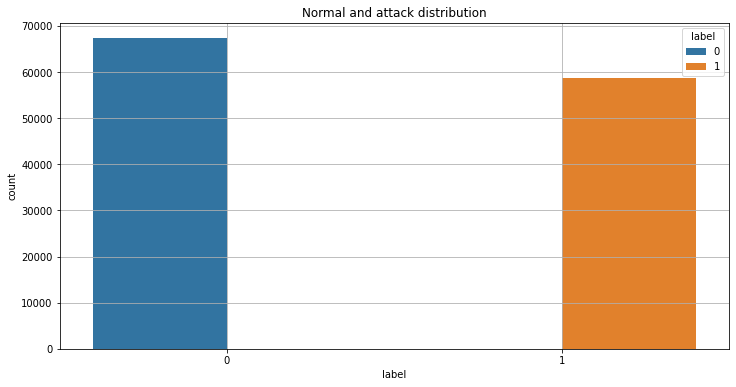

In [ ]:
# distribution plot of class 1 and class 0
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = train_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

In [ ]:
# please specify the sep = ',' parameter ,else all the datapoints will placed in the first column itself
TXT = r"/content/KDDTest+.txt"
test_data =  pd.read_table(TXT,sep = ',', names=fetaures_name)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


### 3.1.3 Reading Test data

In [ ]:
#removing extra useless feature 
test_data = test_data.iloc[:,:-1]
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
print("Shape of the test data",test_data.shape)
print("number of data points ",test_data.shape[0])
print("Number of feature ",test_data.shape[1])

Shape of the test data (22544, 42)
number of data points  22544
Number of feature  42


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

### 3.1.4 : giving class label to the attacks
##### Normal   : 0
##### all other attack : 1

In [ ]:
#stroing all the attack in the variable label    
label = test_data['attack'] 

# mapping all the attack to the desired output which is 0 and 1 
class_label = label.map(labeling)

#creating a new column called label in the training data
test_data['label'] = class_label

In [ ]:
print("shape of the test data",test_data.shape)
test_data.head(3)

shape of the test data (22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,0


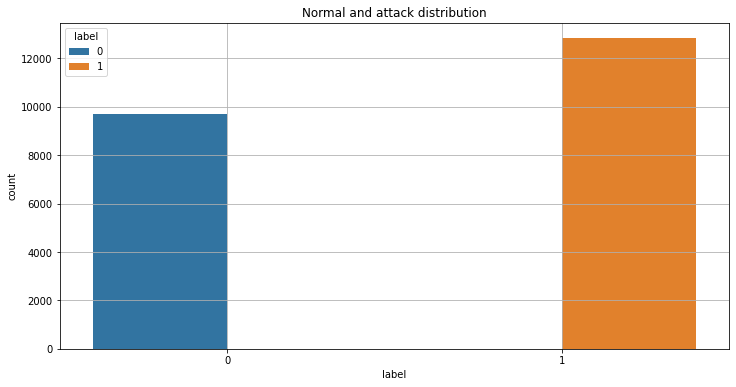

In [ ]:
#distribution plot of class 0 and class 1
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'label' , data = test_data , hue = 'label')
plt.title("Normal and attack distribution")
plt.grid()
plt.show()

### Observation

- There are 42 features both in train and test dataset    


- 15 float value , 23 integer value and 4 object value    


- its look like we dont have null value , however we will recheck again.  


- In the distribution plot of class 0 and 1 : In train dataset class 0 has more datapoints than class 1 and in test dataset class1 has more datapoints than class 0

## 3.2 Data Cleaning 

##### Checking for duplicates values

In [ ]:
# drop_duplicates () : this function return DataFrame with duplicate rows removed.
train_data = train_data.drop_duplicates(subset = fetaures_name[:-1] , keep ='first' , inplace = False)
train_data.shape

(125973, 43)

In [ ]:
##### Checking for Null values

In [ ]:
null_rows = train_data[train_data.isnull().any(1)]
print(null_rows)

Empty DataFrame
Columns: [duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, attack, label]
Index: []


#### Observation
- no duplicate values present
- we dont have null values

## 3.3 Distribution of attacks in the dataset

### 3.3.1 : Train data

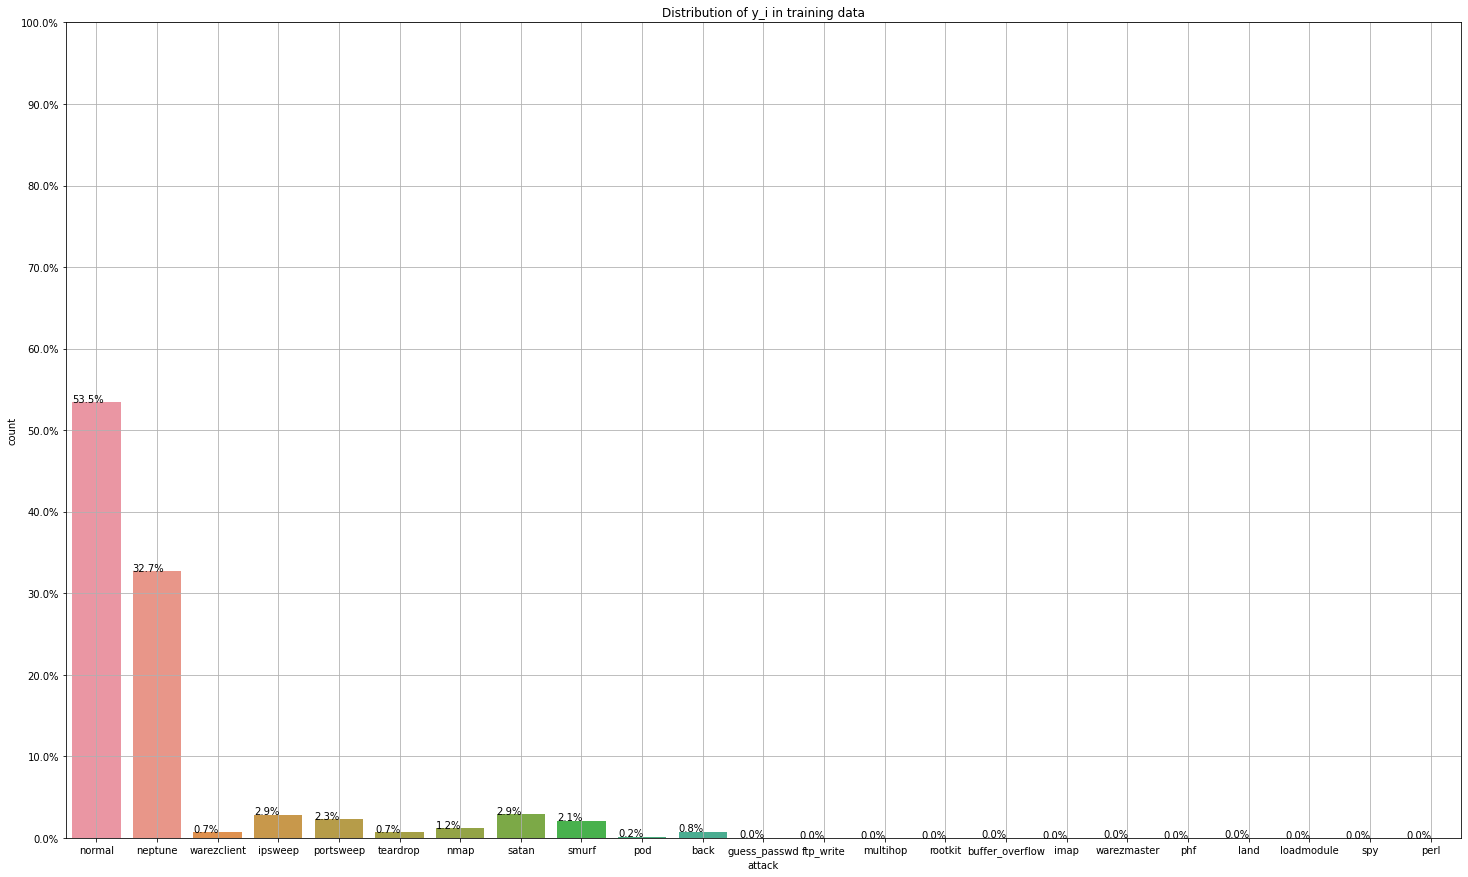

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(25,15))

# we need the total number of data to find the percentage later.
total = len(train_data) * 1

# below code will simply plot bar plot where X axis is attack(23 classes) and y will simply count
ax = sns.countplot(x="attack", data=train_data)


# each p of patches(which is from the countplot) has height(number of data point for a given class ),width.
# then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))


# In th yaxis we are giving interval(11 interval) of datapoints 
ax.yaxis.set_ticks(np.linspace(0, total, 11))


# adjust the ticklabel to the desired format, without changing the position of the ticks.
# map() need the function(what to do) and iterative
# below code : ax.yaxis.get_majorticklocs() - it will give 11 value from 0 to 125973 and we are dividing it with the total value which is 125973 after that we are getting 11 intervals with the percentile 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))

plt.title("Distribution of y_i in training data")
plt.grid()
plt.show()


##### datapoint belonging to each class

In [ ]:
# take the all the class with datapoints belonging to each classes and sort them by label
train_class_distribution = train_data['attack'].value_counts()

# it is sorting them in decreasing order (by number of datapoints)
sorted_yi = np.argsort(-train_class_distribution.values)
# now for each i of the sorted datapoints we are printing the number of datapoints and the percetange
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/len(train_data)*100), 3), '%)')


Number of data points in class 1 : 67343 ( 53.458 %)
Number of data points in class 2 : 41214 ( 32.717 %)
Number of data points in class 3 : 3633 ( 2.884 %)
Number of data points in class 4 : 3599 ( 2.857 %)
Number of data points in class 5 : 2931 ( 2.327 %)
Number of data points in class 6 : 2646 ( 2.1 %)
Number of data points in class 7 : 1493 ( 1.185 %)
Number of data points in class 8 : 956 ( 0.759 %)
Number of data points in class 9 : 892 ( 0.708 %)
Number of data points in class 10 : 890 ( 0.707 %)
Number of data points in class 11 : 201 ( 0.16 %)
Number of data points in class 12 : 53 ( 0.042 %)
Number of data points in class 13 : 30 ( 0.024 %)
Number of data points in class 14 : 20 ( 0.016 %)
Number of data points in class 15 : 18 ( 0.014 %)
Number of data points in class 16 : 11 ( 0.009 %)
Number of data points in class 17 : 10 ( 0.008 %)
Number of data points in class 18 : 9 ( 0.007 %)
Number of data points in class 19 : 8 ( 0.006 %)
Number of data points in class 20 : 7 ( 0.

### Observation :
In the above plot we have 23 different kind of attacks and their distributions :   
  
- data set is not uniform distributed as we can see in the above 

      
- there are lots of attacks where data points are very few and some of the attacks like normal and neptune these both have 85% datapoints out of 100% datapoints    
  

- There are 16 attacks out of 23 attacks where the data points are less then 1% 


##### From this we see that : Normal has 53.5% datapoints and all other 22 class has 46.5% datapoints
we got an imbalanced dataset

### 3.3.2 Test data

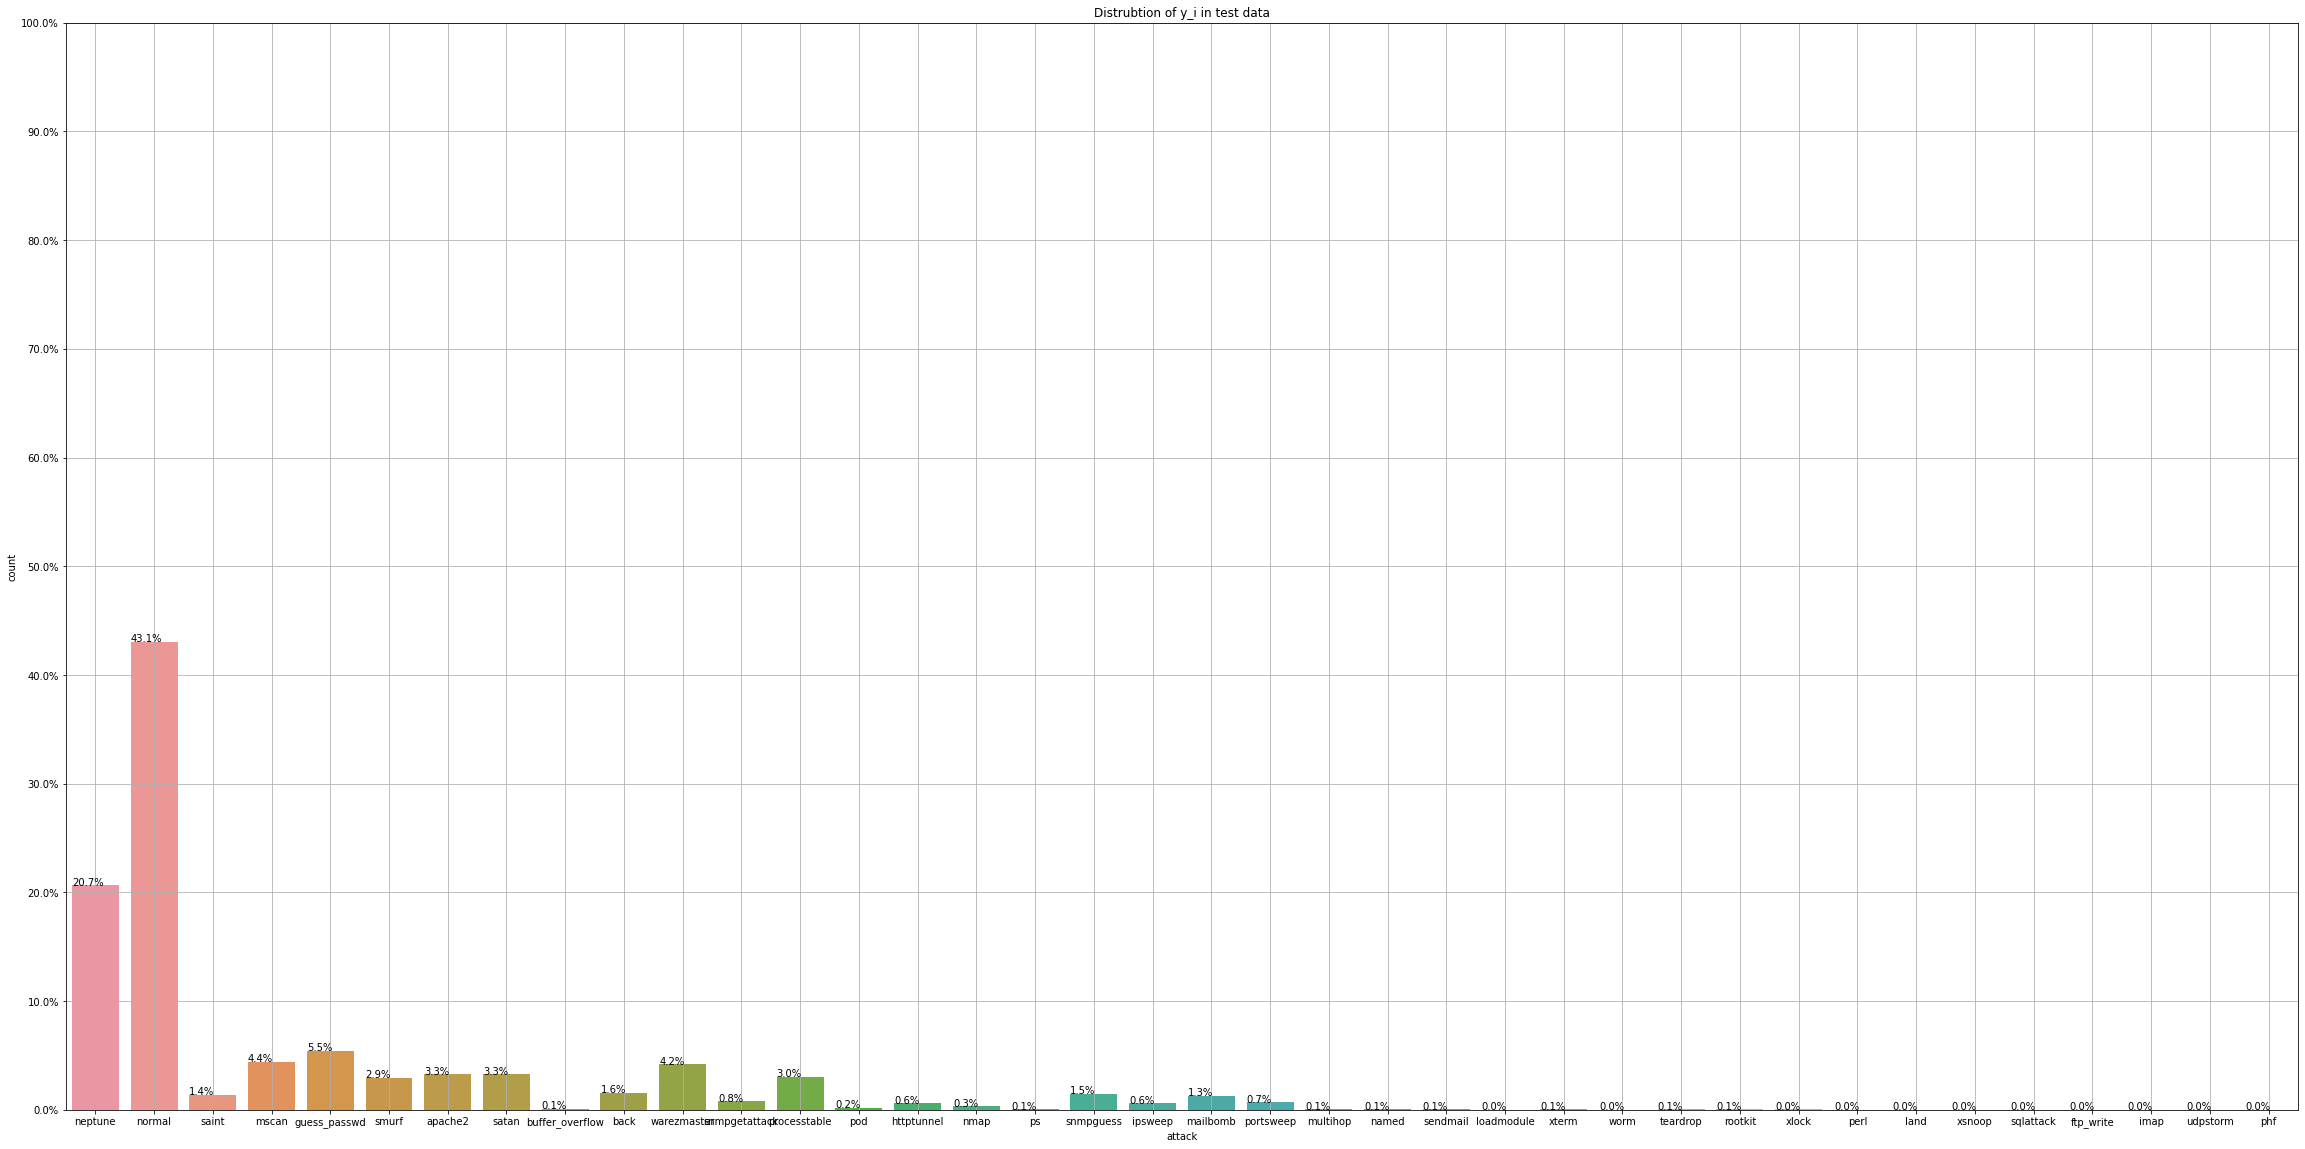

In [ ]:
 #Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(40,20))

# we need the total number of data to find the percentage later.
total = len(test_data) * 1

# below code will simply plot bar plot where X axis is attack(23 classes) and y will simply count
ax = sns.countplot(x="attack", data= test_data )

# each p has height(number of data point for a given class ),width.
# then pass p to annotate(it is used to show text) and computing % of data in each class , give x coord and y coord of rectangle
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))

# put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

# adjust the ticklabel to the desired format, without changing the position of the ticks.
# map() need the function(what to do) and iterative
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.grid()
plt.title("Distrubtion of y_i in test data")
plt.show()

In [ ]:
# take the all the class with datapoints belonging to each classes and sort them by label
test_class_distribution = test_data['attack'].value_counts()

# it is sorting them in decreasing order (by number of datapoints)
sorted_yi = np.argsort(-test_class_distribution.values)
# now for each i of the sorted datapoints we are printing the number of datapoints and the percetange
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution[i], '(', np.round((test_class_distribution.values[i]/len(test_data)*100), 3), '%)')


Number of data points in class 1 : 9711 ( 43.076 %)
Number of data points in class 2 : 4657 ( 20.657 %)
Number of data points in class 3 : 1231 ( 5.46 %)
Number of data points in class 4 : 996 ( 4.418 %)
Number of data points in class 5 : 944 ( 4.187 %)
Number of data points in class 6 : 737 ( 3.269 %)
Number of data points in class 7 : 735 ( 3.26 %)
Number of data points in class 8 : 685 ( 3.039 %)
Number of data points in class 9 : 665 ( 2.95 %)
Number of data points in class 10 : 359 ( 1.592 %)
Number of data points in class 11 : 331 ( 1.468 %)
Number of data points in class 12 : 319 ( 1.415 %)
Number of data points in class 13 : 293 ( 1.3 %)
Number of data points in class 14 : 178 ( 0.79 %)
Number of data points in class 15 : 157 ( 0.696 %)
Number of data points in class 16 : 141 ( 0.625 %)
Number of data points in class 17 : 133 ( 0.59 %)
Number of data points in class 18 : 73 ( 0.324 %)
Number of data points in class 19 : 41 ( 0.182 %)
Number of data points in class 20 : 20 ( 0.0

- there is an intresting thing that is in the test data we have 38 classes.Which did not come to notice earlier.

- here also Normal and naptune classes has larger number of datapoints
-  the same story data is not uniform
- dataset is imbalanced

### 3.2.3  attacks which are not in train data

In [ ]:
# put train and test attack ina set and just find the difference we will get the classes.
trn = set(train_data['attack'].unique())
tst = set(test_data['attack'].unique())

extra = tst - trn

print(extra)
print("*"*100)
print("number of extra Attacks : ",len(extra))

{'snmpguess', 'ps', 'xlock', 'mailbomb', 'sqlattack', 'xsnoop', 'processtable', 'saint', 'snmpgetattack', 'sendmail', 'apache2', 'xterm', 'mscan', 'udpstorm', 'httptunnel', 'named', 'worm'}
****************************************************************************************************
number of extra Attacks :  17


In [ ]:
e_extra = tst - extra
print(e_extra)
print("*"*100)
print("Attacks which are present in both train and test data ", len(e_extra))

{'land', 'nmap', 'imap', 'portsweep', 'warezmaster', 'guess_passwd', 'satan', 'back', 'phf', 'smurf', 'pod', 'ftp_write', 'rootkit', 'ipsweep', 'multihop', 'buffer_overflow', 'neptune', 'loadmodule', 'perl', 'teardrop', 'normal'}
****************************************************************************************************
Attacks which are present in both train and test data  21


In [ ]:
ee_extra = trn - e_extra
print("Attacks which are present in train and not in  test data",ee_extra)

Attacks which are present in train and not in  test data {'spy', 'warezclient'}


### Observation
- we have 17 extra classes in the test data  
- 21 attacks present both in testa nd train dataset  
- there are 2 classes which are not present in the test data but present in the train data , namely : 'spy', 'warezclient  

## 3.4 Univariate analysis on catagorical features

### 3.4.1 Univariate analysis on protocol_type

#### [i] How many category present in this feature

In [ ]:
unique_proto = train_data['protocol_type'].value_counts()
print("Number of unique proto type : ", unique_proto.shape[0])
print(unique_proto)

Number of unique proto type :  3
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


#### Observation
- we have 3 different category of proto type in the training data namely : TCP , UDP and ICMP
- lots of points belongs to tcp where as udp and icmp has fewer points

#### [ii] Distribution of the this feature

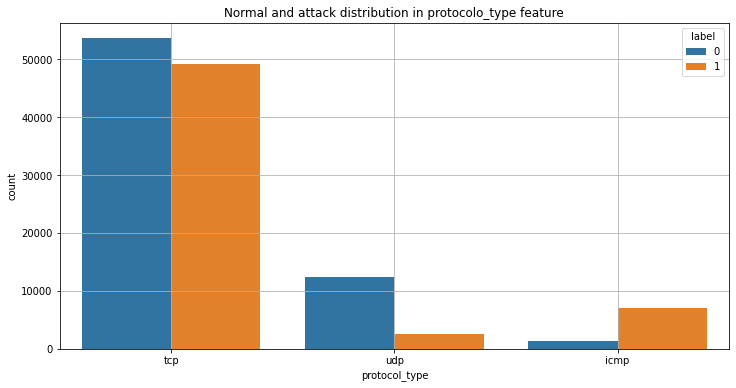

In [ ]:
f, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x = 'protocol_type' , data = train_data , hue = 'label')
plt.title("Normal and attack distribution in protocolo_type feature")
plt.grid()
plt.show()

#### Observation
- There are lots of point from the training data belongs to tcp prtocol_type (102689) . Normal and attack classes both are uniform only in term of tcp. 
- majority of the udp protoype belongs to normal class while there are few points belongs to attack class also.
- In icmp protocol_type majority of points belongs to attack class .

#### [iii] Featurizing using one hot encoding

In [ ]:
prototype_vectorizer = CountVectorizer()
train_protocol_type_encoding = prototype_vectorizer.fit_transform(train_data['protocol_type'])
test_protocol_type_encoding = prototype_vectorizer.transform(test_data['protocol_type'])

In [ ]:
print("train_protocol_type_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_protocol_type_encoding.shape)

train_protocol_type_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 3)


#### [iv] How good is this protocol_type feature in predicting y_i ?
To answer this question will build a Decision tree model model using only protocol_type feature (one hot encoded) to predict y_i.

In [ ]:
# defining y_ture , y_test
y_true = train_data['label']
y_test = test_data['label']

<AxesSubplot:>

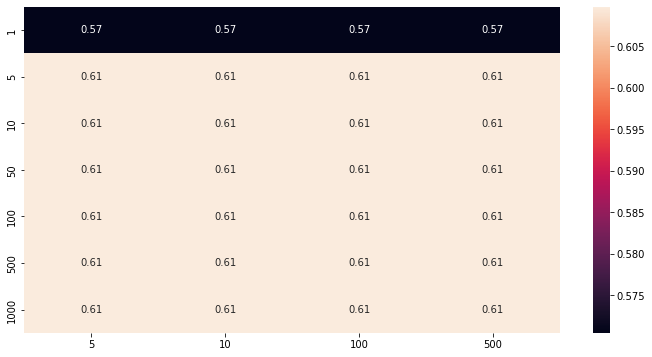

In [ ]:
# Initializatioin of hyperparam and lets take only two hyperparam to tune
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10, 100, 500]}

# using grid search lets find out the best hyperparam value
# Decision tree using gini impurity 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
DT_bow = GridSearchCV(DTC(criterion= 'gini'), parameters,cv=3,scoring='roc_auc',return_train_score=True)
DT_bow.fit(train_protocol_type_encoding,y_true)

# cv_results_dict of numpy (masked) ndarrays
# it will give mean train score as an array
cv_auc = DT_bow.cv_results_['mean_train_score'] 

max_depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]


# reshaping the array (cv_auc) into a shape of (7,4)
# reference:https://qiita.com/bmj0114/items/8009f282c99b77780563
scores = cv_auc.reshape(len(max_depth),len(min_samples_split))
plt.figure(figsize = (12,6))
df = pd.DataFrame(scores, index=max_depth, columns=  min_samples_split)
sns.heatmap(df, annot=True)

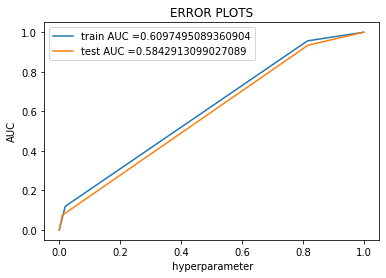

In [ ]:
DT_bow = DTC(criterion= 'gini', max_depth = 10 , min_samples_split =10 )
DT_bow.fit(train_protocol_type_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_protocol_type_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_protocol_type_encoding)[:,1]) 

# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index = prototype_vectorizer.get_feature_names()).sort_values(by = 0, ascending=False)[:20]
print("Top 20 important features :",importance_feature)

Top 20 important features :             0
udp   0.59247
tcp   0.40753
icmp  0.00000


### Observation
- by using only this feature i am getting 58 auc score from this we get to know that this feature may helpful in predicting the yi when we build the actual model using all features.
- the modeling thinking that most important category is udp where as icmp is not at all important

### 3.4.2 Univariate analysis on service

#### [i] How many category present in this feature

In [ ]:
unique_service = train_data['service'].value_counts()
print("Number of unique service : ",unique_service.shape[0])
print(unique_service.head())

Number of unique service :  70
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


#### Observation
- there are two services http and private has quite more datapoints than other.

#### [ii] Distribution of the this feature

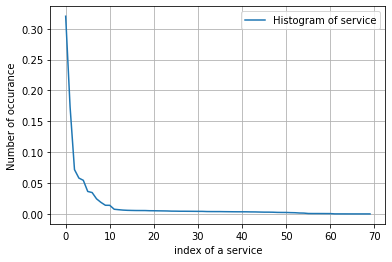

In [ ]:
s = sum(unique_service.values)
h = unique_service.values/s
plt.plot( h , label = 'Histogram of service')
plt.xlabel('index of a service')
plt.ylabel('Number of occurance')
plt.legend()
plt.grid()
plt.show()

#### Observation
- this is a skewed distribution
- there are few services occur more and major of service occur less time .
- In this distribution from left to right services in a decreasing order (frequency).  
- 0th index contain the http, 1st index contain private etc.  

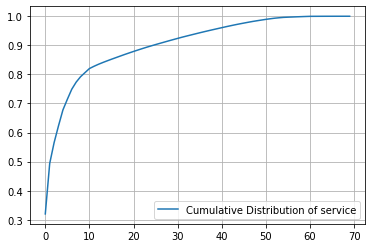

In [ ]:
c = np.cumsum(h)
plt.plot(c , label = "Cumulative Distribution of service")
plt.grid()
plt.legend()
plt.show()

#### Observation
- Top 20 to 25 services contributed to 90 percent of data.that means these services occur very frequently than other services.


#### [iii] Featurizing using one hot encoding

In [ ]:
service_encode = CountVectorizer()
train_service_encoding = service_encode.fit_transform(train_data['service'])
test_service_encoding = service_encode.transform(test_data['service'])

In [ ]:
print("train_service_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_service_encoding.shape)

train_service_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 70)


#### [iv] How good is this protocol_type feature in predicting y_i ?
To answer this question will build a Decision tree model model using only protocol_type feature (one hot encoded) to predict y_i.

<AxesSubplot:>

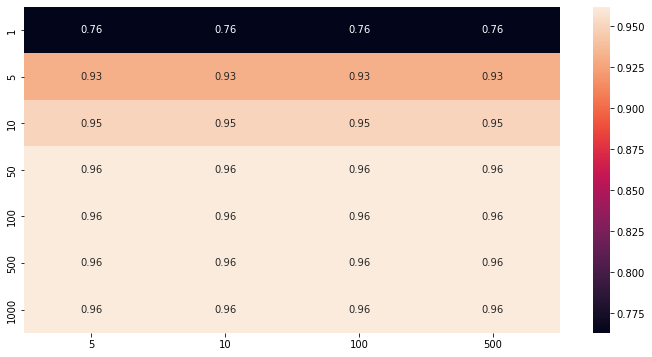

In [ ]:
# Initializatioin of hyperparam and lets take only two hyperparam to tune
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10, 100, 500]}

# using grid search lets find out the best hyperparam value
# Decision tree using gini impurity 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
DT_bow = GridSearchCV(DTC(criterion= 'gini'), parameters, cv=3 ,scoring='roc_auc',return_train_score=True)
DT_bow.fit(train_service_encoding,y_true)

# cv_results_dict of numpy (masked) ndarrays
# it will give mean train score as an array
cv_auc = DT_bow.cv_results_['mean_train_score'] 
max_depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]


# reshaping the array (cv_auc) into a shape of (7,4)
# reference:https://qiita.com/bmj0114/items/8009f282c99b77780563
scores = cv_auc.reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize = (12,6))
df = pd.DataFrame(scores, index=max_depth, columns=  min_samples_split)
sns.heatmap(df, annot=True)

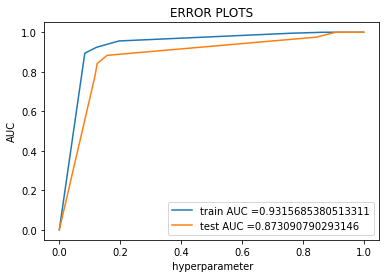

In [ ]:
from sklearn.metrics import roc_curve, auc

DT_bow = DTC(criterion= 'gini', max_depth = 5 , min_samples_split = 5 )
DT_bow.fit(train_service_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value    
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_service_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_service_encoding)[:,1]) 


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index=service_encode.get_feature_names()).sort_values(by = 0, ascending=False)[:10]
print("Top 20 important features :",importance_feature)

Top 20 important features :                  0
http      0.463197
domain_u  0.203933
smtp      0.183391
ftp_data  0.102067
other     0.047413
nntp      0.000000
ntp_u     0.000000
pm_dump   0.000000
pop_2     0.000000
pop_3     0.000000


#### Observation
- by using only this single feature my model giving 87 test auc value which is quite intersting 
- Out of 70 feature only 5 of them is important .
- This information might be useful in feature engineering (we can remove feature with 0.0 values) 

### 3.4.3 Univariate analysis on Flag

#### [i] How many category present in this feature

In [ ]:
flag_unique = train_data['flag'].value_counts()
print("Number of unique flag : ", flag_unique.shape[0])
print(flag_unique.head())

Number of unique flag :  11
SF      74945
S0      34851
REJ     11233
RSTR     2421
RSTO     1562
Name: flag, dtype: int64


#### [ii] Distribution of the this feature

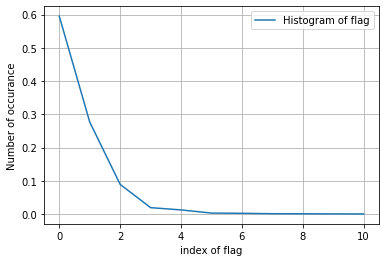

In [ ]:
# taking sum
s = sum(flag_unique.values)
# diving each falg vaue to sum
h = flag_unique.values/s
plt.plot(h , label = 'Histogram of flag')
plt.xlabel("index of flag")
plt.ylabel('Number of occurance')
plt.grid()
plt.legend()
plt.show()

- there are 3 - 4 falg has mpre number of occurance
- skewed distribution

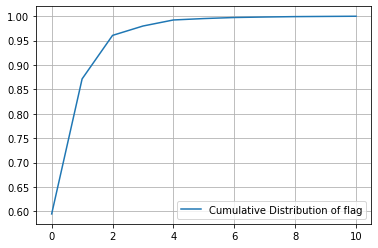

In [ ]:
c = np.cumsum(h)
plt.plot(c , label = 'Cumulative Distribution of flag')
plt.legend()
plt.grid()
plt.show()

- out of 10 falg 4 flag contibuted 98 -99% of data , these 4 flags are occuring more frequently.

#### [iii] Featurizing using one hot encoding

In [ ]:
flag_encoding = CountVectorizer()
train_flag_encoding = flag_encoding.fit_transform(train_data['flag'])
test_flag_encoding = flag_encoding.transform(test_data['flag'])

In [ ]:
print("train_flag_encoding is converted feature using one-hot encoding method. The shape of gene feature:",train_flag_encoding.shape)

train_flag_encoding is converted feature using one-hot encoding method. The shape of gene feature: (125973, 11)


#### [iv] How good is this protocol_type feature in predicting y_i ?
To answer this question will build a Decision tree model model using only protocol_type feature (one hot encoded) to predict y_i.

<AxesSubplot:>

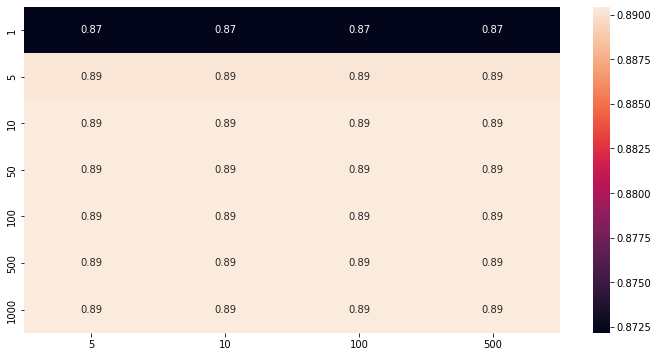

In [ ]:
# Initializatioin of hyperparam and lets take only two hyperparam to tune

parameters = {'max_depth':[1, 5, 10, 50, 100, 500,1000],
              'min_samples_split':[5, 10, 100, 500]}

# using grid search lets find out the best hyperparam value
# Decision tree using gini impurity 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
DT_bow = GridSearchCV(DTC(criterion= 'gini'), parameters, cv=3 ,scoring='roc_auc',return_train_score=True)
DT_bow.fit(train_flag_encoding,y_true)

# cv_results_dict of numpy (masked) ndarrays
# it will give mean train score as an array
cv_auc = DT_bow.cv_results_['mean_train_score'] 
max_depth = [1,5,10,50,100,500,1000]
min_samples_split = [5,10,100,500]


# reshaping the array (cv_auc) into a shape of (7,4)
# reference:https://qiita.com/bmj0114/items/8009f282c99b77780563
scores = cv_auc.reshape(len(max_depth),len(min_samples_split))

plt.figure(figsize = (12,6))
df = pd.DataFrame(scores, index=max_depth, columns=  min_samples_split)
sns.heatmap(df, annot=True)

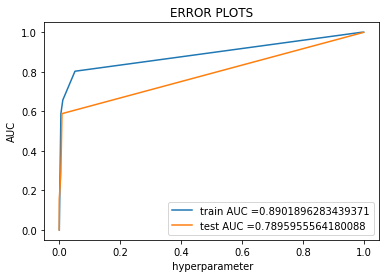

In [ ]:
from sklearn.metrics import roc_curve, auc

DT_bow = DTC(criterion= 'gini', max_depth = 5 , min_samples_split = 10 )
DT_bow.fit(train_flag_encoding , y_true)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value       
train_fpr, train_tpr, thresholds = roc_curve(y_true, DT_bow.predict_proba(train_flag_encoding)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT_bow.predict_proba(test_flag_encoding)[:,1])


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
# to find important feature create a dataframe 
# pass data where we have the DTC attribute feature importance will give all the feature with important feature
# next pass the index where it will have the feature name coresponding to the feature importance value
# sort all the value desceding order

importance_feature = pd.DataFrame(data = DT_bow.feature_importances_.T, index=flag_encoding.get_feature_names()).sort_values(by = 0, ascending=False)[:11]
print("Top 20 important features :",importance_feature)

Top 20 important features :                0
sf      0.954620
s0      0.026476
s1      0.011691
s2      0.003657
rej     0.003556
oth     0.000000
rsto    0.000000
rstos0  0.000000
rstr    0.000000
s3      0.000000
sh      0.000000


#### Observation
- By look at the train and  test auc value the model might be overffiting , but we have 78 test auc value, which showing us that this model will helful
- there is one category which is most important : 'sf' this category itself has value of 95 . 

## 3.5 Univariate analysis on some continuous features

### 1.Duration
length (number of seconds) of the connection 

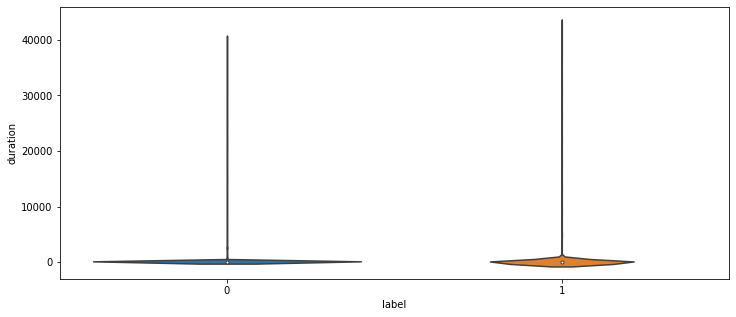

In [ ]:
plt.figure(figsize =(12,5))
# violin plot
sns.violinplot(x ='label' , y = 'duration' , data = train_data )
plt.show()

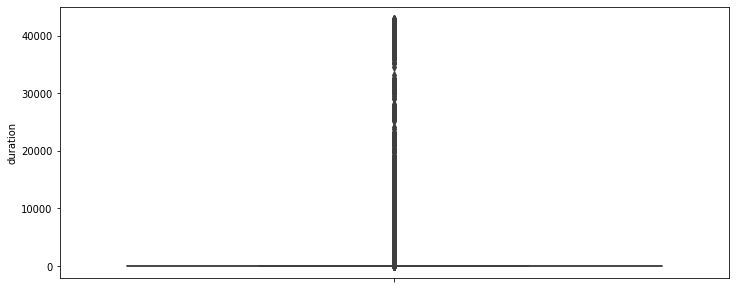

In [ ]:
plt.figure(figsize =(12,5))
# violin plot
sns.boxplot(y ='duration' ,  data = train_data )
plt.show()

#### Observation
- mean, median, 25th ,50th,75th percentile is so small to analyse beacuse most of the duration is 0 
- lets look into 0 to 100% percentile value

In [ ]:
for i in range(0,100,10):
    # take all the value of duration column
    var = train_data['duration'].values
    # falttend them and sort in ascending order
    var = np.sort(var , axis= None)
    # formula to calculate percentile "int(len(var)*float(i)/100"
    print("{} percentile value {}".format(i,var[int(len(var)*float(i)/100)]))
print("100 percentile value is ",var[-1])

0 percentile value 0
10 percentile value 0
20 percentile value 0
30 percentile value 0
40 percentile value 0
50 percentile value 0
60 percentile value 0
70 percentile value 0
80 percentile value 0
90 percentile value 0
100 percentile value is  42908


#### Observation
- about 90 percentile value of duration is 0
- there are lots of value we can see in 100 percentile
- so lets look at from 90 to 100 percentile

In [ ]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = train_data['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 1
94 percentile value is 2
95 percentile value is 4
96 percentile value is 15
97 percentile value is 31
98 percentile value is 2052
99 percentile value is 9592
100 percentile value is  42908


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['duration'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 9592
99.1 percentile value is 10910
99.2 percentile value is 12666
99.3 percentile value is 13858
99.4 percentile value is 16693
99.5 percentile value is 19981
99.6 percentile value is 25761
99.7 percentile value is 30679
99.8 percentile value is 37141
99.9 percentile value is 39984
100 percentile value is  42908


#### Observation
- value of duration has increased from 90 percentile onward.
- if we look at the violine plot of class label 1 there is some value which might be upto 2k to 3k
- from 99.0 to 100 percentile the value is increased dramatically..these value might be outlier.

### 2 . src_bytes
number of data bytes from source to destination 

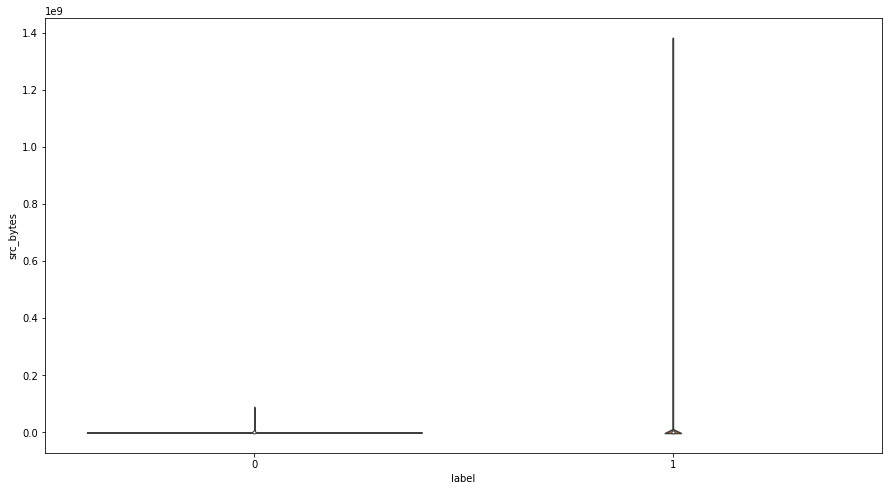

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'src_bytes' , data = train_data)
plt.show()

#### Observation
- for both label 0 and 1 it is hard to analys .but one thing to notice is class 1 which attack has quite larger value than class 0 which is normal 

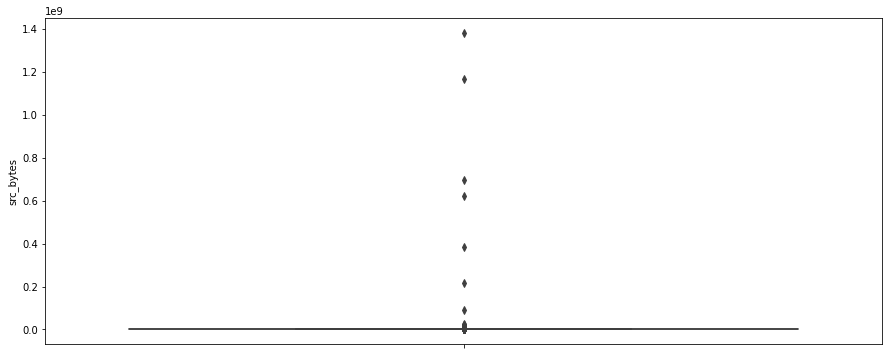

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'src_bytes' ,data = train_data)
plt.show()

#### Observation
- from this box plot we can see all the value from 25th to 75th percentile has zero. it is hard to interprit.
- lets agaim zoom into the percentile value of src_bytes.    

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['src_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 1
50 percentile value is 44
60 percentile value is 192
70 percentile value is 235
80 percentile value is 307
90 percentile value is 848
100 percentile is  1379963888


#### Observation
- As we can see there is a big jump from 90% to 100 %

In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['src_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 848
91 percentile value is 1006
92 percentile value is 1032
93 percentile value is 1087
94 percentile value is 1264
95 percentile value is 1480
96 percentile value is 1830
97 percentile value is 2974
98 percentile value is 8737
99 percentile value is 54540
100 percentile is  1379963888


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['src_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 54540
99.1 percentile value is 54540
99.2 percentile value is 54540
99.3 percentile value is 54540
99.4 percentile value is 54540
99.5 percentile value is 54540
99.6 percentile value is 175337
99.7 percentile value is 501760
99.8 percentile value is 2194619
99.9 percentile value is 2194619
100 percentile value is  1379963888


#### Observation
- there is a huge value in the 100 % which 1379963888byte equivalent to 1.28GB  goes from source to destination.

### 3.dst_bytes 
number of data bytes from destination to source 

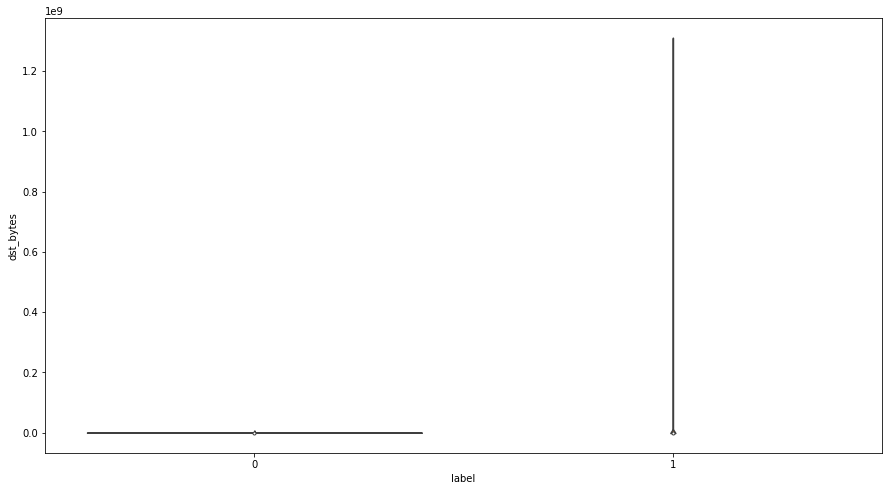

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'dst_bytes' , data = train_data)
plt.show()

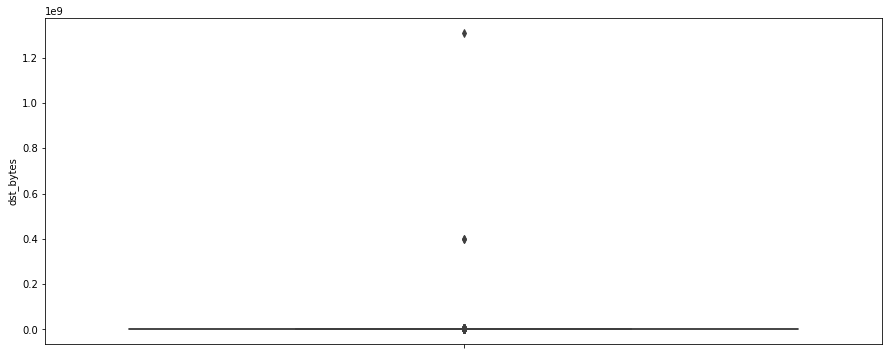

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'dst_bytes' ,data = train_data)
plt.show()

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['dst_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 110
70 percentile value is 334
80 percentile value is 1085
90 percentile value is 3376
100 percentile is  1309937401


In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['dst_bytes'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 3376
91 percentile value is 4058
92 percentile value is 4777
93 percentile value is 5876
94 percentile value is 7273
95 percentile value is 8314
96 percentile value is 9432
97 percentile value is 11715
98 percentile value is 15342
99 percentile value is 25519
100 percentile is  1309937401


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['dst_bytes'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 25519
99.1 percentile value is 27264
99.2 percentile value is 29122
99.3 percentile value is 31377
99.4 percentile value is 34030
99.5 percentile value is 37236
99.6 percentile value is 42766
99.7 percentile value is 52225
99.8 percentile value is 81172
99.9 percentile value is 235008
100 percentile value is  1309937401


#### Observation
- here is also a huge value in the 100 % which 1309937401byte equivalent to 1.21GB  goes from  destination to source.

### 4. wrong_fragment
number of wrong fragments   
IP fragmentation is an Internet Protocol (IP) process that breaks packets into smaller pieces (fragments)

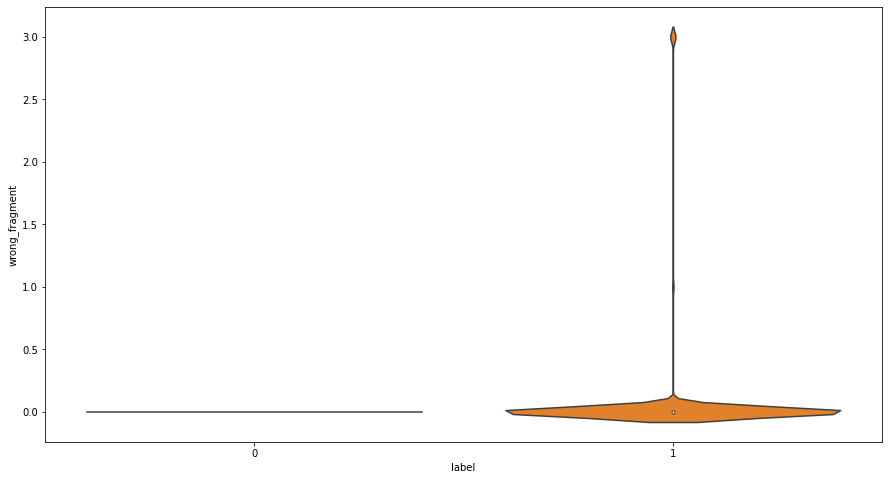

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'label' , y = 'wrong_fragment' , data = train_data)
plt.show()

#### Observation
- there is so much variance in the class 1 while there no variance in class 0
- there is some diffrence in class 0 and 1 .this might help to distinguish from class 1 to 0

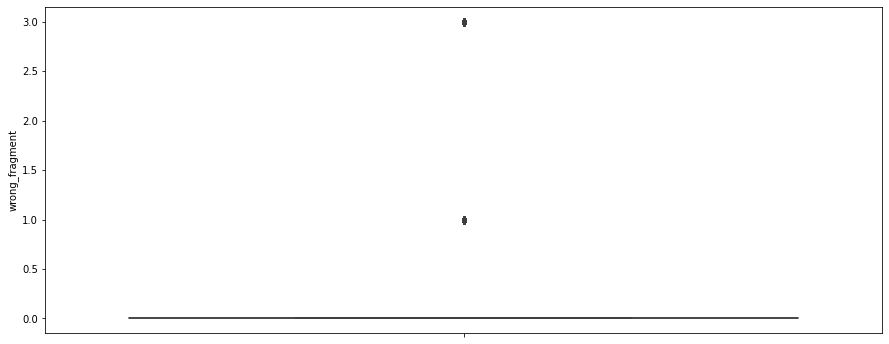

In [ ]:
plt.figure(figsize = (15,6))
sns.boxplot(y = 'wrong_fragment' ,data = train_data)
plt.show()

In [ ]:
# CALCULATING PERCENTILE FROM 0,10,20,30,...,100
for i in range(0,100,10):
    var = train_data['wrong_fragment'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 0
70 percentile value is 0
80 percentile value is 0
90 percentile value is 0
100 percentile is  3


In [ ]:
# calculating percentile from 90,91,92,...,100
for i in range(90,100):
    var = train_data['wrong_fragment'].values
    var = np.sort(var , axis = None)
    print("{} percentile value is {}".format(i , var[int(len(var)*float(i)/100)]))
print("100 percentile is ",var[-1])

90 percentile value is 0
91 percentile value is 0
92 percentile value is 0
93 percentile value is 0
94 percentile value is 0
95 percentile value is 0
96 percentile value is 0
97 percentile value is 0
98 percentile value is 0
99 percentile value is 0
100 percentile is  3


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train_data['wrong_fragment'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 0
99.1 percentile value is 0
99.2 percentile value is 1
99.3 percentile value is 3
99.4 percentile value is 3
99.5 percentile value is 3
99.6 percentile value is 3
99.7 percentile value is 3
99.8 percentile value is 3
99.9 percentile value is 3
100 percentile value is  3


#### Observation
- this feature seems to be ok as there is not so much inflection

### 3.6 Bivariate Analysis (pair plots)

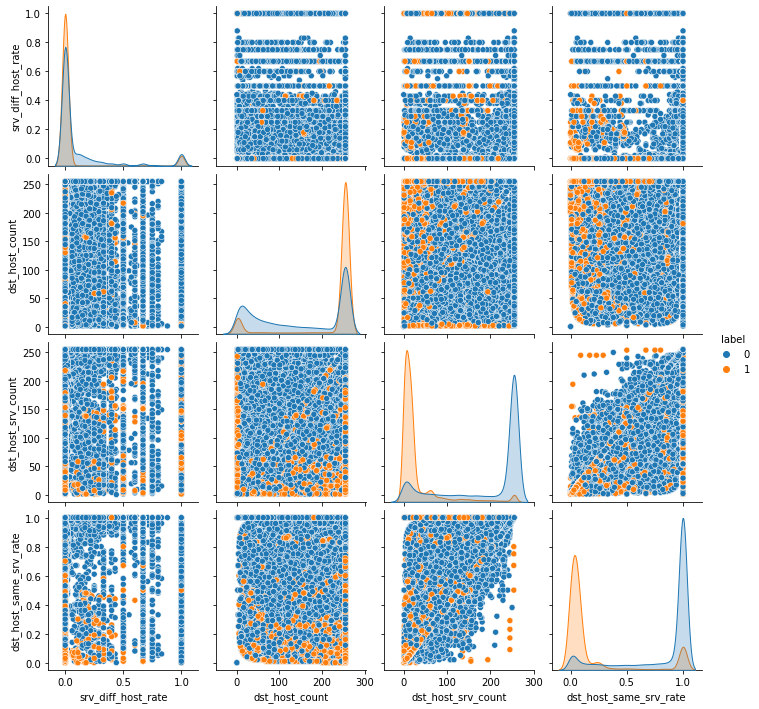

In [ ]:
n = train_data.shape[0]
sns.pairplot(train_data[['srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate', 'label']][0:n], hue='label', vars=['srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate'])
plt.show()

#### Observation
- if we look the dst_host_count and dst_host_same_srv_rate feature there are some point (not fully) but partially separeble ,but there are some overlap point also.
- dst_hst_srv_count and dst_host_count here also in the middle there are some overlap and some of the datapoints are partially separable 
- If we look at the pdf of these 4 feature   
        - srv_diff_host_rate : the class 0 have higer value than class 1
        - dst_host_count : all over the class 1 is placed and have much higher value than class 0
        - dst_host_srv_count : there is some over lap region between class 1 and 0, class 1 have higher value than class 0.
        - dst_host_same_srv_rate : it look both class 1 and class 0 separated ,but there are quite overlap datapoints.
lets try to analyse dst_host_srv_count and dst_host_same_srv_rate

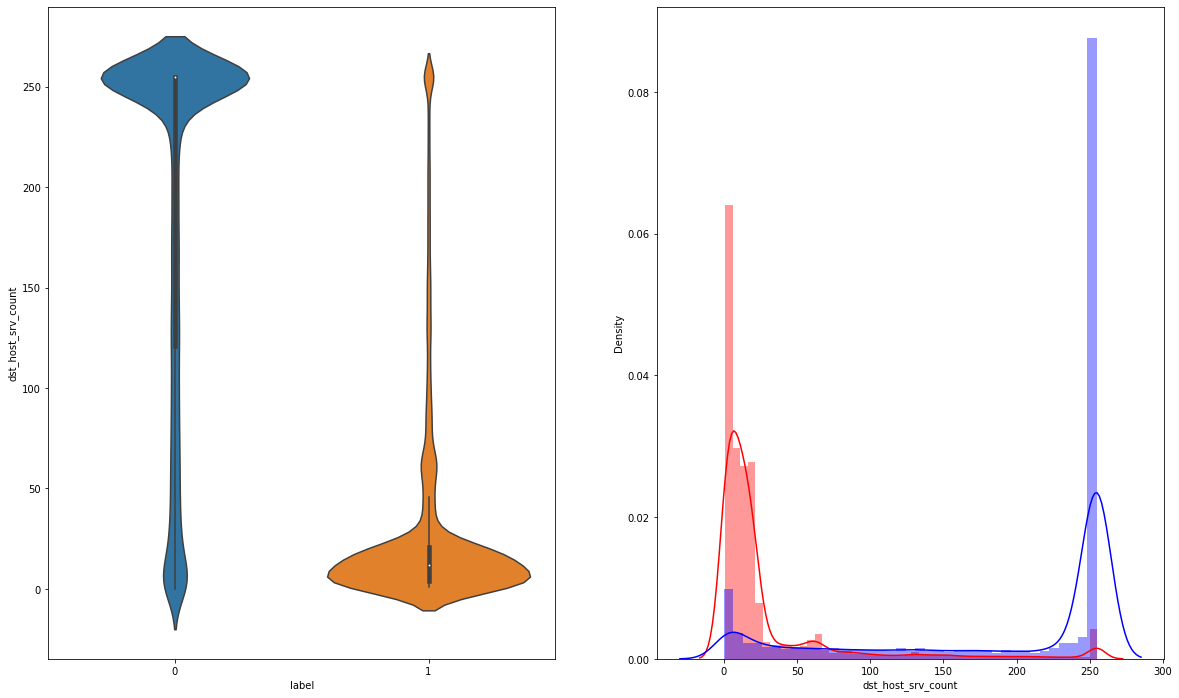

In [ ]:
plt.subplots(figsize = (20,12))
plt.subplot(1,2,1)
sns.violinplot(x = 'label',y = 'dst_host_srv_count',data = train_data )

plt.subplot(1,2,2)
sns.distplot(train_data[train_data['label'] == 1]['dst_host_srv_count'][0:] , label = '1' ,color = 'red' )
sns.distplot(train_data[train_data['label'] == 0]['dst_host_srv_count'][0:] , label = '0' ,color = 'blue' )
plt.show()


#### Observation
- These 2 violins are not fully overlap , this "dst_host_srv_count" feature may be usful in classification

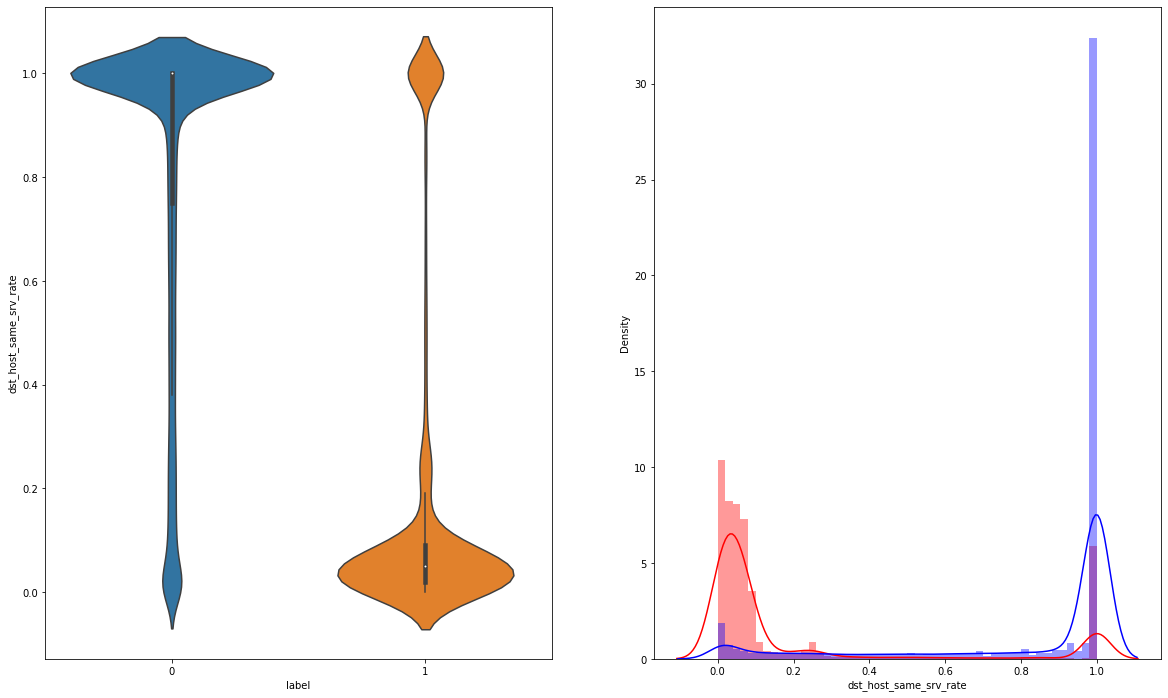

In [ ]:
plt.subplots(figsize = (20,12))
plt.subplot(1,2,1)
sns.violinplot(x = 'label',y = 'dst_host_same_srv_rate',data = train_data )

plt.subplot(1,2,2)
sns.distplot(train_data[train_data['label'] == 1]['dst_host_same_srv_rate'][0:] , label = '1' ,color = 'red' )
sns.distplot(train_data[train_data['label'] == 0]['dst_host_same_srv_rate'][0:] , label = '0' ,color = 'blue' )
plt.show()

#### Observation
- here also both class is not overlapping fully(in term of 25th 50th and 75th percentile) so there is some separebility in this dst_host_same_srv_rate.


### 3.7 Multivariate analysis using TSNE

In [ ]:
# Using TSNE lets visualize the data from 32dim(continuous variable) to 2 dim
train_data_sample = train_data[0:7000]
# why minmax ? : actually there is no specific reason beacuse i have tried both and both of them working similarly for this case.
X = MinMaxScaler()
# we have 32 continuous feature.
X  = X.fit_transform(train_data_sample[["duration","src_bytes",
    "dst_bytes","wrong_fragment","urgent","hot","num_failed_logins","num_compromised","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"]])
y = train_data_sample['label'].values

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.003s...
[t-SNE] Computed neighbors for 7000 samples in 1.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.014220
[t-SNE] Computed conditional probabilities in 0.273s
[t-SNE] Iteration 50: error = 85.9375305, gradient norm = 0.0397944 (50 iterations in 4.200s)
[t-SNE] Iteration 100: error = 71.0520325, gradient norm = 0.0070593 (50 iterations in 3.481s)
[t-SNE] Iteration 150: error = 67.5428772, gradient norm = 0.0043809 (50 iterations in 5.375s)
[t-SNE] Iteration 200: error = 

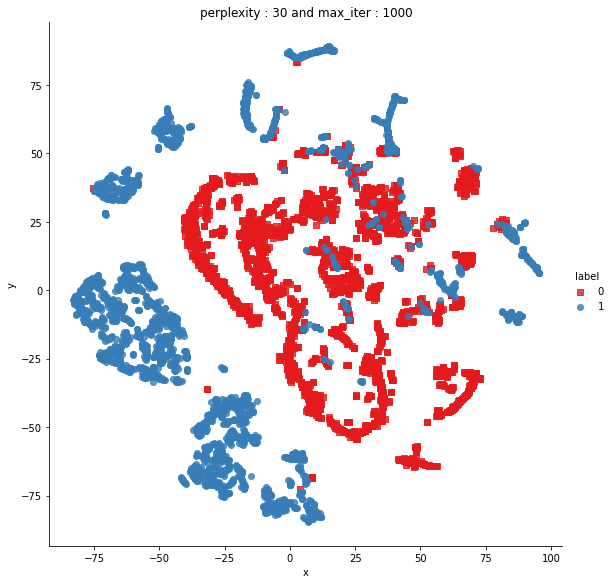

In [ ]:
# creating a dataframe by puting a dict : where x will have all the value from 1st col and y will have value of 2nd col
# tsne have emmbeding vector of size (7000,2)
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# drawing the plot in appropriate place in the grid
# implot is basically a combination of facetgrid and regplot.
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False,palette="Set1",size=8,markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=50.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.002s...
[t-SNE] Computed neighbors for 7000 samples in 1.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.020443
[t-SNE] Computed conditional probabilities in 0.438s
[t-SNE] Iteration 50: error = 80.8078003, gradient norm = 0.0264628 (50 iterations in 4.194s)
[t-SNE] Iteration 100: error = 66.4931793, gradient norm = 0.0059719 (50 iterations in 4.331s)
[t-SNE] Iteration 150: error = 63.7165985, gradient norm = 0.0030565 (50 iterations in 2.972s)
[t-SNE] Iteration 200: error =

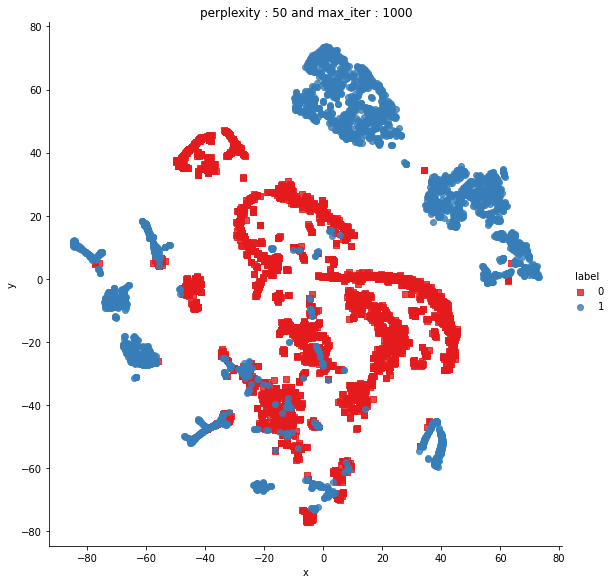

In [ ]:
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(50, 1000))
plt.show()

In [ ]:
tsne1 = TSNE(n_components=2, perplexity=15.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=2, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.001s...
[t-SNE] Computed neighbors for 7000 samples in 1.201s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.009311
[t-SNE] Computed conditional probabilities in 0.150s
[t-SNE] Iteration 50: error = 94.0726318, gradient norm = 0.0345712 (50 iterations in 3.110s)
[t-SNE] Iteration 100: error = 78.4949875, gradient norm = 0.0092495 (50 iterations in 2.451s)
[t-SNE] Iteration 150: error = 74.0893860, gradient norm = 0.0056283 (50 iterations in 3.967s)
[t-SNE] Iteration 200: error = 

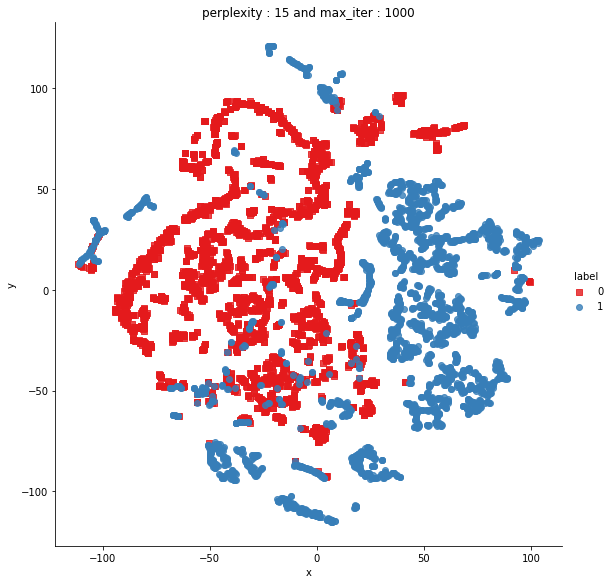

In [ ]:
df = pd.DataFrame({'x':tsne1[:,0], 'y':tsne1[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(15, 1000))
plt.show()

#### Observation
- Here 32dim continious variable is taken and reducing them to 2 dim
- from the 3 plot we can observe that thsese 32 continuous variable will gonna be helpful in determining the class label.
- in the First plot where perplexity is 30 : the class 1 and class 0 are separated , yes there are some region of overlapping but most of them are separeted.The same story is we can see on plot number 2 and in the 3.

# Summary of EDA

- After reading the dataset got to know that these dataset have not the feature name in their appropriate column so columns name were given 
     - Shape of the training data (datapoints : 125973, features : 42)
     - Shape of the test data (datapoints : 22544, features : 42)


- The task is to identify wether a given connection is normal or attack , for that created a column "label" and gave all the attacks which is name normal as class 0 and all other attack as class 1.   


- By checking the distribution of the dataset with respect to the class label ,found that dataset is little bit imbalanced(53.5% normal and 46.5% attack).   


- Checked for duplicate and null value : there were not null and duplicate value.   


- Checked for distribution with respect to different attacks in train and test dataset :  
       Train data
       * data set is not uniform distributed (by looking at different attacks)
       * there are lots of attacks where data points are very few and some of the attacks like normal and neptune these 
         both have 85% datapoints out of 100% datapoints
       * There are 16 attacks out of 23 attacks where the data points are less then 1%
       Test data
       * look at the test dataset we got bunch of new attacks which are not in the test data
       * here also the normal and neptune attacks has more datapoints than other
- To analysis the feature i thought to analyse the categorical feature and numerical feature separetly.   


- <b>Univariate analysis on categorical feature</b> 

     - we have 3 categorical feature : protocol_type , service and flag
     - to analysis these categorical feature i gone have through 4 things    
       
         1. <b>Number of category present in the dataset </b>:  
         ans :     
            - In protocol_feature : 3 category present tcp,upd and icmp where  majority of the points are from tcp and udp . 
            - In service feature : 70 unique category present  
            - In flag feature :    11 unique category present   
            
         2. <b>Distribution of the categorical feature</b> :  
        ans : 
            - In protocol_feature : tcp has both normal and attack class datapoints reasonable, where udp has more class0 (normal) points than class1(attack) and icmp has more class 1
            - In service feature : The distribution is skewed where few services occur more and major of service occur less time.
            - In flag feature : It is also a skewed distribution    
        
         3. <b>featurization of the categorical feature</b> :  
         ans: All of them have been featurize using one hot encoding    
         
         4. <b>How good is this protocol_type feature in predicting y_i </b>?  
         ans :  building a simple model (Decison tree classifer) for each categorical feature and know the important feature.
            - In protocol_feature : we get some feature impotance where udp is the most important feature in predicting yi where icmp is less  
                  
            - In service feature : model got test auc value of 87 by only using this feature this means this categorical feature will be useful when we build actual model.There are few feature which is important not all.            
           
            - In flag feature : this fearure also useful as it has 78 test auc score, the model might overfit a little bit as train and test auc has gap.
            
            
     - There are some category where the model thought that those are not at all important , we can do some feature engineering by removing those unimportant features.   
     
- <b> Univariate analysis on continuous feature</b>  

     - Duration : majority of points have value of zero of this feature , from 98 percentile onward values are changing.  
     
     - src_bytes : values of this feature are increasing in a slow rate upto 98 - 99.9 , but there is sudden change in the 100 percintile with a quite large value(1.25 gb) which mean 1.25 gb of data goes from source to destination, this might be an outlier.   
     
     - dst_bytes : this is same as the src_byte , in the 100 percentile there is quite big number(1.21 gb of data from destination to source) this could be an outlier or may be these values are sign of attack.
     - wrong_fragment : in the the violin plot class 1 has more variance than class 1 while class 0 has value around 0
- <b> Bivariate Analysis using pair plot </b>
     - By looking at the pair plot we can say that there are some overlap between class1 and class0, but not fully.
     - the PDF's of each feature has some information like one pdf(class 0) has more value than another(class1) and vice versa. With this information i looked at the the violin plot and the pdf separetly  of some feature , where some of them are not fully overlap so we can say these fearure may helpful in distinguish
class0 and class 1
- <b> Multivariate analysis using tSNE </b>
     - Here i have taken 32 feature and ploted using tsne with 7k datapoints , there result i get is quite brilliant
     - classes are separable
     - less overlapping points.

<h1>4. Machine Learning Models </h1>

###### Machine Learning model as follows :
- we have fewer features so lets build model which are tend to work well on fewer features.  

#### 1. Naive Bayes (Base line model)
 - Base line model should be simple so that we can compare it with other models .  
 
#### 2. KNN
#### 3. Logistic regression
 - Logistic regression beacause , its an experiment may be the line separate well both classes , let see.  
 
#### 4. Decision Tree
#### 5. Random Forest
#### 6. Xgboost  

### Merging all numerical and categorical feature 

In [ ]:
protocol_type_col1=train_data['protocol_type']
service_col1=train_data['service']
flag_col1=train_data['flag']
attack_col1=train_data['attack']
label_col1=train_data['label']

In [ ]:
protocol_type_col2 = test_data['protocol_type']
service_col2=test_data['service']
flag_col2=test_data['flag']
attack_col2=test_data['attack']
label_col2=test_data['label']

In [ ]:
train_data['protocol_type']=protocol_type_col1
train_data['service']=service_col1
train_data['flag']=flag_col1
train_data['attack']=attack_col1
train_data['label']=label_col1

In [ ]:
test_data['protocol_type']=protocol_type_col2
test_data['service']=service_col2
test_data['flag']=flag_col2
test_data['attack']=attack_col2
test_data['label']=label_col2

In [ ]:
train_data.shape

(125973, 43)

In [ ]:
test_data.shape

(22544, 43)

In [ ]:
# read about hstack : https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html
"""
A = coo_matrix([[1, 2], [3, 4]])
B = coo_matrix([[5], [6]])
hstack([A,B]).toarray()
array([[1, 2, 5],
       [3, 4, 6]])
"""
# take protocol_type one_hot_encoding vector and service one_hot_encoding vector and merge them using hstack
train_protocol_service_encoding = hstack((train_protocol_type_encoding, train_service_encoding))
test_protocol_service_encoding = hstack((test_protocol_type_encoding,  test_service_encoding))

# take train_proto_services_encoding vector and flag one_hot_encoding vector and merge them using hstack
train_protocol_service_flag_encoding = hstack((train_protocol_service_encoding, train_flag_encoding))
test_protocol_service_flag_encoding  = hstack((test_protocol_service_encoding ,test_flag_encoding))

# defining y_train and y_test
y_train = train_data['label']
y_test  = test_data['label']
# removing label, attck,protocol_type,service,flag column from train and test data
train_data.drop(['protocol_type','service','flag','attack','label'], axis=1, inplace=True)
test_data.drop(['protocol_type','service','flag','attack','label'], axis=1, inplace=True)

X_train = hstack((train_protocol_service_flag_encoding , train_data))
X_test = hstack((test_protocol_service_flag_encoding , test_data))

### Standardization 

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_mean = False)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
print("Shape of the training data after mergeing - datapoints : ",X_train.shape[0],"features : ",X_train.shape[1],  " and y_train :",y_train.shape[0])
print("Shape of the test data after mergeing - datapoints : ",X_test.shape[0],"features : ",X_test.shape[1]," and y_test : ",y_test.shape[0])

Shape of the training data after mergeing - datapoints :  125973 features :  122  and y_train : 125973
Shape of the test data after mergeing - datapoints :  22544 features :  122  and y_test :  22544


### Plot : Confusion matrix ,  Precision , Recall

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.'
# refer - AAIC
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("Orange")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

## 4.1 Base line Model
## Naive Bayes
#### Hyper parameter tuning

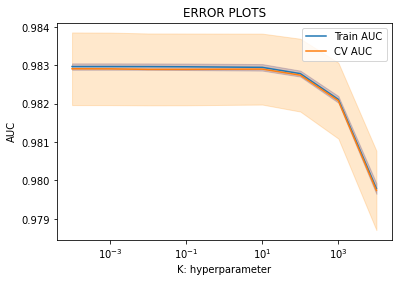

In [ ]:
# creating object of multinomial naive bayes
multi_NB = MultinomialNB()

# giving bunch of laplace parameter
parameters = {'alpha': [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]}
alpha_range = [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]

# putting the model in grid search cv to find the best hyper param 
clf = GridSearchCV(multi_NB ,parameters,cv = 10 , scoring='roc_auc' , return_train_score = True)

#fitting X_train and y_train with the multinomial naive bayes
clf.fit(X_train, y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha_range, train_auc, label='Train AUC')
# refer : https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_range, cv_auc, label='CV AUC')
# refer : https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

#### fiiting with best param

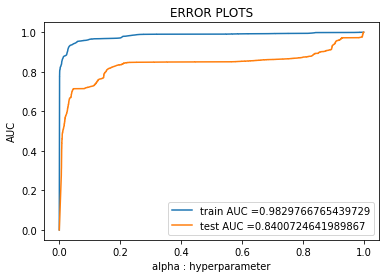

In [ ]:
from sklearn.metrics import roc_curve, auc

multi_NB =MultinomialNB(alpha = 0.01)
multi_NB.fit(X_train,y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train, multi_NB.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, multi_NB.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = multi_NB.predict(X_train)
y_test_pred = multi_NB.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))


Train f1 score 0.9258446608869385
Test f1 score 0.7687546886721681
****************************************************************************************************
train recall score / detection rate 0.8852294047415998
test recall score / detection rate 0.6388217875788982


Train confusion_matrix


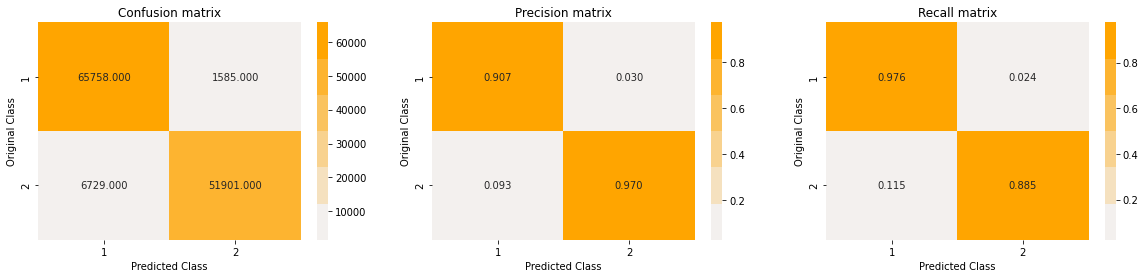

Test confusion_matrix


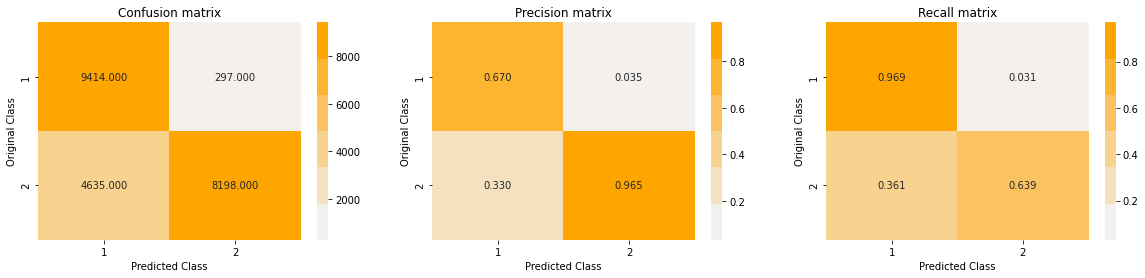

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

###### Before getting to observation lets know how to read these metric
- what test auc score 64 means :- chance of classfying points correctly is 64%   

- F1 score - it is the inverse of avg of precision and recall . it will give high value when both precision and recall is high  

- reading precsion and reacll matrix :-  

   - precision (columns sums to 1) : of all the point which are predicted to belong to class0 67% are actually belong to class 0 and 33% are belong to class1 

   - recall(row sums to 1) : of all the point which are actually belong to class1 63% are predicted to class 1 and 36%  class0  

### Observation :
- there is a gap in trian and test AUC value which mean the model is overfitting 
- lets do some feature selection to reduce the overfitting
- feature selection by Recursive feature elemination

## 4.2 Feature selection by recursive feature elemination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.  
refer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [ ]:
#Encoding the categorical data using label enocder
encoder = LabelEncoder()

# get the categorical features
cat_train = train_data.select_dtypes(include = 'object').copy()
cat_test = test_data.select_dtypes(include = 'object').copy()
cat_train_encode = cat_train.apply(encoder.fit_transform)
cat_test_encode = cat_test.apply(encoder.fit_transform)

# dropping attack feature
cat_train_encode = cat_train_encode.drop(['attack'],axis = 1)
cat_test_encode = cat_test_encode.drop(['attack'],axis = 1)

In [ ]:
# shape of the encoded feature
print(cat_train_encode.shape)
print(cat_train_encode.shape)

(125973, 3)
(125973, 3)


In [ ]:
# get all the numerical feature
num_train = train_data.select_dtypes(include = ['float64','int64'])
num_test = test_data.select_dtypes(include = ['float64','int64'])

# join numerical and categorical feature
features = pd.concat([num_train ,cat_train_encode],axis =1).columns
x_train_encode = np.concatenate((num_train , cat_train_encode),axis=1)
x_test_encode = np.concatenate((num_test , cat_test_encode),axis=1)

In [ ]:
# shape after joining categorical and numerical features
print(x_train_encode.shape)
print(x_train_encode.shape)

(125973, 42)
(125973, 42)


In [ ]:
# converting the joined feature into a dataframe
x_train_encoder = pd.DataFrame(x_train_encode ,columns = features)
x_test_encoder = pd.DataFrame(x_test_encode , columns = features)

# dropping the label class 
x_train_encoder = x_train_encoder.drop(['label'],axis = 1)
x_test_encoder = x_test_encoder.drop(['label'],axis = 1)

In [ ]:
# shape after removing label
print(x_train_encoder.shape)
print(x_test_encoder.shape)

(125973, 41)
(22544, 41)


In [ ]:
# this feature is useless as it has only contain zeros ,remove from dataframe
x_train_encoder = x_train_encoder.drop(['num_outbound_cmds'],axis = 1)
x_test_encoder = x_test_encoder.drop(['num_outbound_cmds'],axis = 1)

In [ ]:
# print shape
print(x_train_encoder.shape)
print(x_test_encoder.shape)

(125973, 40)
(22544, 40)


In [ ]:
# put correlated features into set , beacuse it will store only single feature not redundant
correlated_features = set()

# create a correlated feature of the train data
# it Compute pairwise correlation of columns, excluding NA/null values.
# by default "pearson correlation " 
# refer : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
correlation = x_train_encoder.corr()

#iterate through each column
for i in range(correlation.shape[0]):
    #iterate through ecah value of the given column
    for j in range(i):
        # give the i : column and j : vlaue in that column
        # if the value is > .8 remove them
        if abs(correlation.iloc[i,j]) > 0.8:
            # take that column which is >.8
            column = correlation.columns[i]
            # add it to the above set 
            correlated_features.add(column)
              

In [ ]:
# print which are irrelavant features and how many them
print(correlated_features)
print(len(correlated_features))

{'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'srv_serror_rate', 'num_root', 'is_guest_login'}
9


In [ ]:
# droppin the irrelevant feature
x_train_encoder = x_train_encoder.drop(['is_guest_login', 'dst_host_srv_rerror_rate', 'srv_serror_rate', 'num_root', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'srv_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate'],axis=1)

In [ ]:
# shape after dropping the irrelevant fetaures
x_train_encoder.shape

NameError: ignored

In [ ]:
# create a randomforest classifer (why :  beacuse random forest tend to work well on feature importance)
rfc = RandomForestClassifier(random_state=101)

# put the object of randomforest into the recursive feature elemination using cross validation
# refer : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv.fit(x_train_encoder, y_train)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
rfc = RandomForestClassifier(max_depth=8, random_state=0)
clf = RFECV(rfc, step=1, cv=3)
clf.fit(x_train_encoder,y_train)

RFECV(cv=3, estimator=RandomForestClassifier(max_depth=8, random_state=0))

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

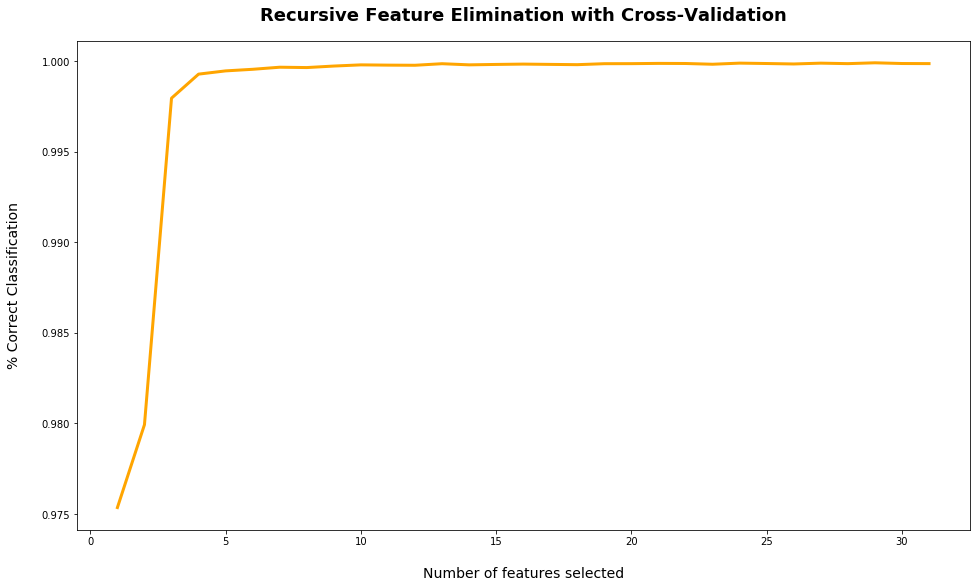

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='orange', linewidth=3)
plt.show()

28                           flag
18                  same_srv_rate
1                       src_bytes
22             dst_host_srv_count
23         dst_host_diff_srv_rate
16                    serror_rate
14                          count
2                       dst_bytes
27                        service
24    dst_host_same_src_port_rate
25    dst_host_srv_diff_host_rate
26                  protocol_type
7                       logged_in
15                      srv_count
5                             hot
19                  diff_srv_rate
21                 dst_host_count
17                    rerror_rate
0                        duration
8                 num_compromised
3                  wrong_fragment
20             srv_diff_host_rate
11             num_file_creations
6               num_failed_logins
13               num_access_files
9                      root_shell
12                     num_shells
10                   su_attempted
4                          urgent
Name: attr, dt

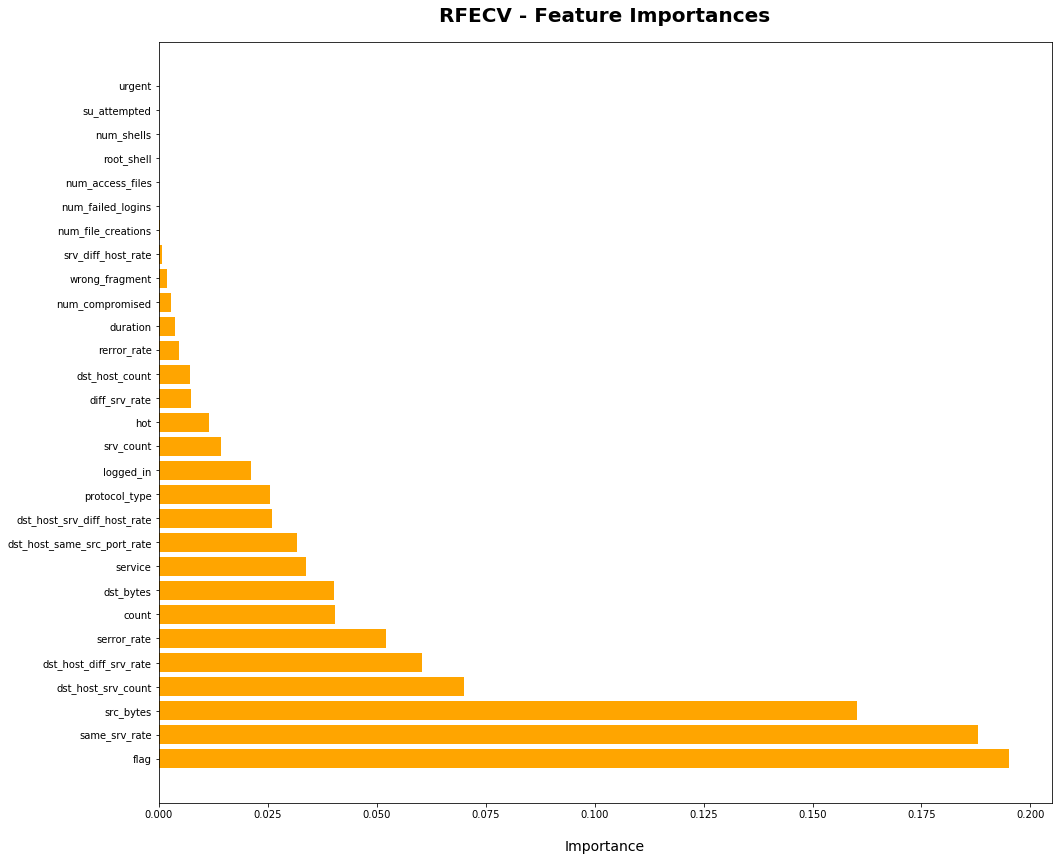

In [ ]:
dset = pd.DataFrame()
dset['attr'] = x_train_encoder.columns

dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)
print(dset.attr)

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='orange')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

##### Understanding the above 4.2 section :
- take the object type feature (means categorical) encode using label encoder 
- merge both encoder categorical features and numerical features
- compute the correlation matrix using a dataframe method corr() which by default use pearson correlation coefficient
- iterate thorugh two for loop and take out those feature whose value greater than .8 int he correlation matrix
- now by using recursive feature elemination (using random forest model , we can use any model of our choice but RF give good feature importance) it gave 29 feature which are useful in predicting the model(called optimal features)
- Then plot the most important features by looking we can again remove some feature which are vey small value 

#### lets use those selected features

In [ ]:
# pleae re run the first few cell
# removing correlated features/irrelevant features from train data 
X_train_after_FS = train_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)
X_test_after_FS = test_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)

In [ ]:
# shape after removing correlated features/irrelevant features from traing data
print(X_train_after_FS.shape )
print(X_test_after_FS.shape )

(125973, 36)
(22544, 36)


In [ ]:
# removing featues which are adding less value , by looking at the RFECV
X_train_after_FS = X_train_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)
X_test_after_FS = X_test_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)

In [ ]:
# shape after removing above features
print(X_train_after_FS.shape )
print(X_test_after_FS.shape )

(125973, 25)
(22544, 25)


In [ ]:
# defining y_train and y_test
y_train = train_data['label']
y_test  = test_data['label']

# removing label, attck,protocol_type,service,flag column from train and test data
X_train_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)
X_test_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)

print(X_train_after_FS.shape)
print(X_train_after_FS.shape)

(125973, 21)
(125973, 21)


In [ ]:
# take protocol_type one_hot_encoding vector and service one_hot_encoding vector and merge them using hstack
train_protocol_service_encoding = hstack((train_protocol_type_encoding, train_service_encoding))
test_protocol_service_encoding = hstack((test_protocol_type_encoding,  test_service_encoding))

# take train_proto_services_encoding vector and flag one_hot_encoding vector and merge them using hstack
train_protocol_service_flag_encoding = hstack((train_protocol_service_encoding, train_flag_encoding))
test_protocol_service_flag_encoding  = hstack((test_protocol_service_encoding ,test_flag_encoding))

In [ ]:
# merging the categorical onehot encoded feature and numerical feature
X_train = hstack((train_protocol_service_flag_encoding , X_train_after_FS))
X_test = hstack((test_protocol_service_flag_encoding , X_test_after_FS))

In [ ]:
print("Shape of the training data after mergeing - datapoints : ",X_train.shape[0],"features : ",X_train.shape[1],  " and y_train :",y_train.shape[0])
print("Shape of the test data after mergeing - datapoints : ",X_test.shape[0],"features : ",X_test.shape[1]," and y_test : ",y_test.shape[0])

Shape of the training data after mergeing - datapoints :  125973 features :  105  and y_train : 125973
Shape of the test data after mergeing - datapoints :  22544 features :  105  and y_test :  22544


In [ ]:
# standardization
scalar = StandardScaler(with_mean = False)
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


## Modeling with selected features

## 4.3 Naive Bayes with Hyperparameter tuning

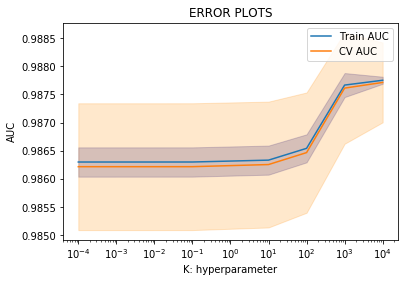

In [ ]:
# creating object of multinomial naive bayes
multi_NB = MultinomialNB()

# giving bunch of laplace parameter
parameters = {'alpha': [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]}
alpha_range = [10**-4, 10**-3, 10**-2, 10**-1, 10**1, 10**2, 10**3,10**4]

# putting the model in grid search cv to find the best hyper param 
clf = GridSearchCV(multi_NB ,parameters,cv = 10 , scoring='roc_auc' , return_train_score = True)

#fitting X_train and y_train with the multinomial naive bayes
clf.fit(X_train, y_train)

train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(alpha_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(alpha_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.xscale('log')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

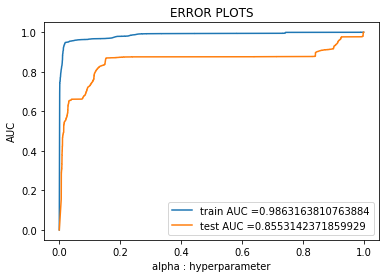

In [ ]:
multi_NB =MultinomialNB(alpha = 10)
multi_NB.fit(X_train,y_train)


train_fpr, train_tpr, thresholds = roc_curve(y_train, multi_NB.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, multi_NB.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = multi_NB.predict(X_train)
y_test_pred = multi_NB.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9607209835382371
Test f1 score 0.773419258429065
****************************************************************************************************
train recall score / detection rate 0.9436465973051339
test recall score / detection rate 0.6452894880386504


Train confusion_matrix


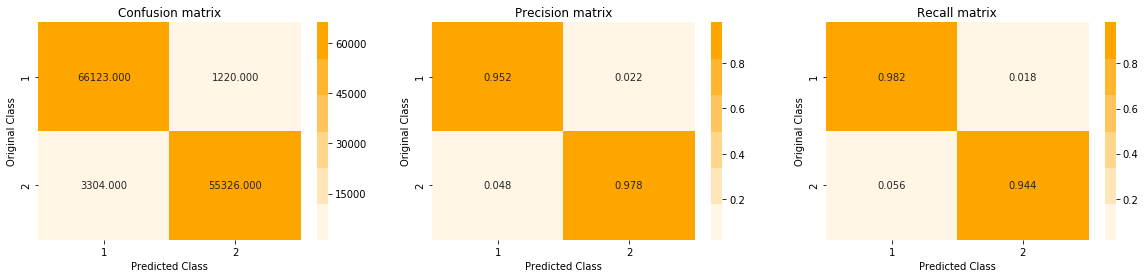

Test confusion_matrix


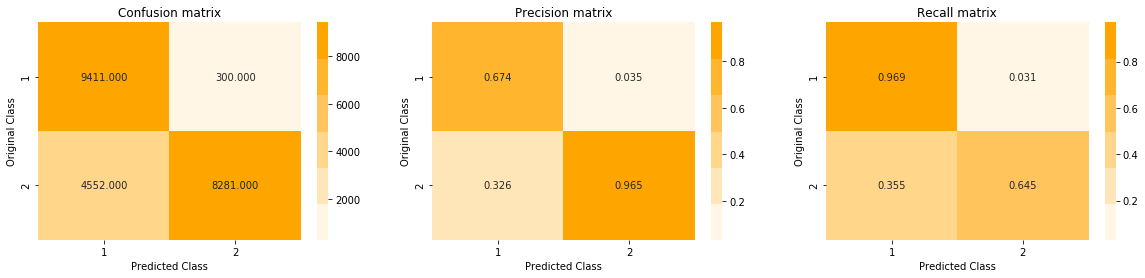

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- there is a slight improvement on the f1 score and the recall aswell after removing some irrelavent features
- there seems to be some confusion on recall : of all the actual point 64% are predicted to be class 2 and around 36% predicted to be class 0

## 4.4 KNN Hyperparameter tuning


For values of alpha =  5 The auc score is: 0.8284514978796195
For values of alpha =  11 The auc score is: 0.832554284897594
For values of alpha =  15 The auc score is: 0.8374096641918964
For values of alpha =  21 The auc score is: 0.8447889306016743
For values of alpha =  31 The auc score is: 0.8590116479560955
For values of alpha =  41 The auc score is: 0.8686272301701836
For values of alpha =  51 The auc score is: 0.8760993378794436
For values of alpha =  99 The auc score is: 0.8918894763568558


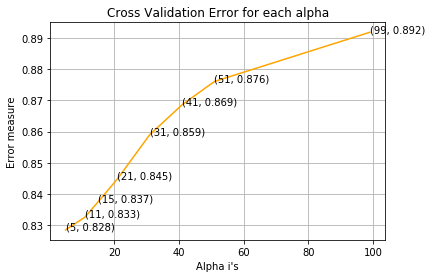

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

alpha = [5, 11, 15, 21, 31, 41, 51, 99]

auc = []
for i in alpha:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    predict_y = clf.predict_proba(X_test)[:,1]
    auc.append(roc_auc_score(y_test, predict_y))
    print('For values of alpha = ', i, "The auc score is:",roc_auc_score(y_test, predict_y))

fig, ax = plt.subplots()
ax.plot(alpha, auc,c='orange')
for i, txt in enumerate(np.round(auc,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],auc[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
clf = KNeighborsClassifier(n_neighbors =99)
clf.fit(X_train, y_train)
predict_y_train = clf.predict_proba(X_train)[:,1]
print('For values of best alpha = ', 99, "The train auc score is:",roc_auc_score(y_train, predict_y_train))
predict_y_test = clf.predict_proba(X_test)[:,1]
print('For values of best alpha = ', 99, "The test auc score is:",roc_auc_score(y_test, predict_y_test))

For values of best alpha =  99 The train auc score is: 0.9997159094312437
For values of best alpha =  99 The test auc score is: 0.8918894763568558


In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train f1 score 0.9902896052698944
Test f1 score 0.7806070670726082
****************************************************************************************************


NameError: name 'recall_score' is not defined

In [ ]:
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9902896052698944
Test f1 score 0.7806070670726082
****************************************************************************************************
train recall score / detection rate 0.9897322190005117
test recall score / detection rate 0.6593158263851009


Train confusion_matrix


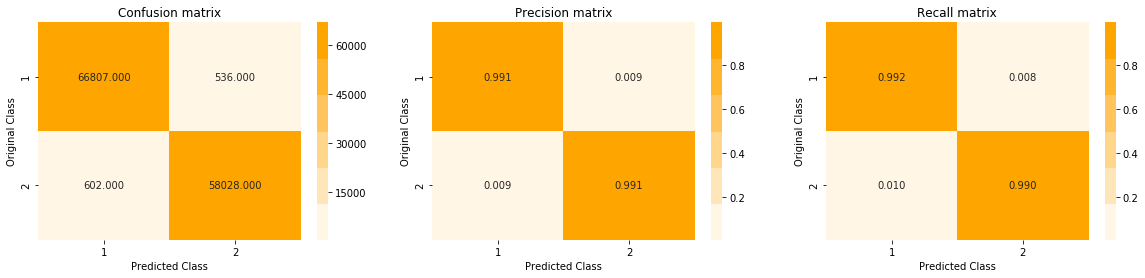

Test confusion_matrix


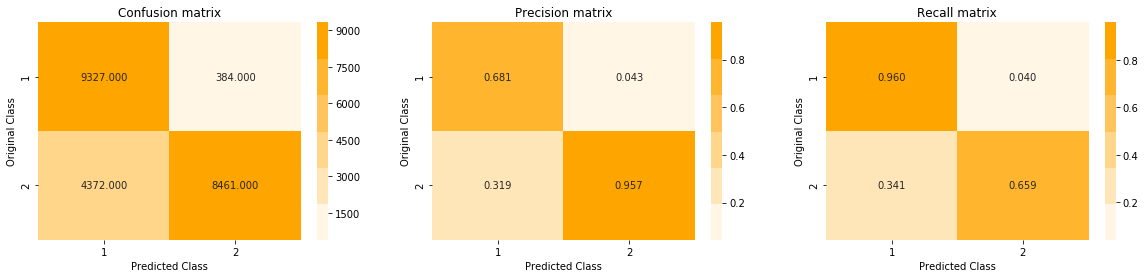

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- The simple knn model giving us more auc as well as f1 and recall value which is good sign
- but still there is some confusion on test data between class 2 and class 1 in the recall
- This may be because of the class imbalance

## 4.5 Logistic regression Hyperparameter tuning

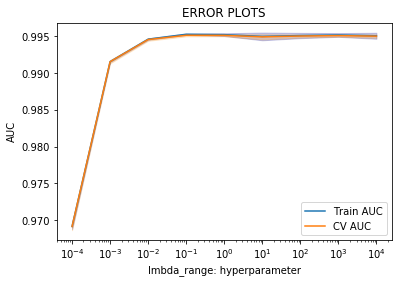

In [ ]:
# giving range of hyperparam value which we wanted to try to find the best param
parameters = [{'C': [10**-4 , 10**-3 , 10**-2 , 10**-1 , 10**0, 10**1 , 10**2, 10**3, 10**4]}]

# to find best param use grid search or random search this upto you
clf = GridSearchCV(LogisticRegression(penalty = 'l1'), parameters , cv=3 ,scoring='roc_auc') 
# fitting it to the train data
clf.fit(X_train,y_train)

# these below 3 line code will give train,test mean and standard deviation value 
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

plt.plot(lambda_range, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,train_auc - train_auc_std,train_auc + train_auc_std , alpha=0.2, color='darkblue')

plt.plot(lambda_range, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(lambda_range,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.legend()
plt.xlabel("lmbda_range: hyperparameter")
plt.xscale("log")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

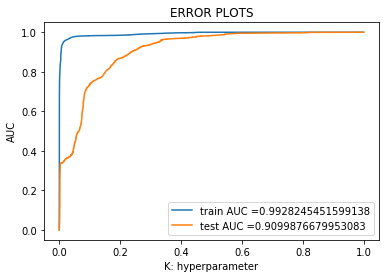

In [ ]:
best_lambda = 0.01
LG = LogisticRegression(C = best_lambda , penalty = 'l1',class_weight={0:.1,1:.15})
LG.fit(X_train , y_train)
    
train_fpr, train_tpr, thresholds = roc_curve(y_train, LG.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, LG.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
from sklearn.metrics import f1_score

y_train_pred = LG.predict(X_train)
y_test_pred = LG.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9671355060034306
Test f1 score 0.7264708642207001


In [ ]:
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

train recall score / detection rate 0.9616919665700153
test recall score / detection rate 0.6032883971012234


Train confusion_matrix


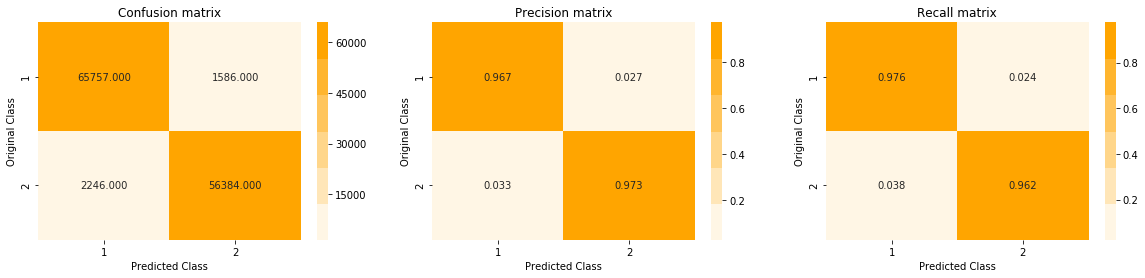

Test confusion_matrix


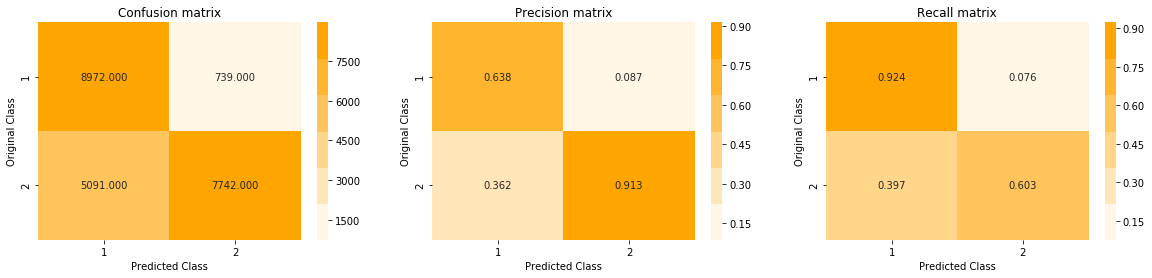

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- The model has high auc value but the f1 and recall is lower than the base line model
- here also at recall model has some confusion

## 4.6 Decision tree with hyperparameter tuning

In [ ]:
# Initializatioin of hyperparam and lets take only two hyperparam to tune
from scipy.stats import randint as sp_randint
parameters =  parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000],
              'min_samples_split':[5, 10,50,100, 500]}
# using grid search lets find out the best hyperparam value
# Decision tree using gini impurity 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
DT = GridSearchCV(DTC(criterion= 'gini'), parameters, cv=3 ,scoring='roc_auc')
DT.fit(X_train,y_train)

print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

NameError: name 'rf_random' is not defined

In [ ]:
print('mean test scores',DT.cv_results_['mean_test_score'])
print('mean train scores',DT.cv_results_['mean_train_score'])

mean test scores [0.92156999 0.92156999 0.92156999 0.92156999 0.92156999 0.99511075
 0.99511075 0.99511015 0.99514581 0.99510648 0.99737902 0.99749718
 0.99779678 0.99792748 0.99799855 0.9986813  0.99897157 0.99927804
 0.99942874 0.99951991 0.99871326 0.99894064 0.99931134 0.99943723
 0.99952023 0.99867799 0.99895565 0.99930187 0.99941272 0.99949448
 0.99876851 0.99898544 0.99929542 0.99942099 0.99949417]
mean train scores [0.92156999 0.92156999 0.92156999 0.92156999 0.92156999 0.9951623
 0.9951623  0.9951623  0.9951395  0.99510212 0.99854283 0.99853955
 0.99852493 0.99850043 0.99834232 0.99999981 0.99999894 0.99999132
 0.99996708 0.99982699 0.99999981 0.99999894 0.99999132 0.99996686
 0.99982699 0.9999998  0.99999894 0.99999143 0.99996708 0.99982699
 0.9999998  0.99999896 0.99999143 0.99996686 0.99982699]


In [ ]:
print(DT.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [ ]:
DT =DTC(class_weight={0:.1,1:15}, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

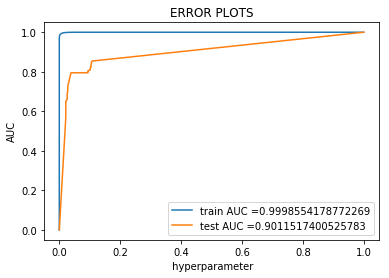

In [ ]:
from sklearn.metrics import roc_curve, auc

DT.fit(X_train , y_train)
    
# roc_curve function will return 3 thing fpr,trp, threshold 
# calling predict_proba with the best estimater that we have
# train fpr and tpr give the an arry with flauctuate value       
train_fpr, train_tpr, thresholds = roc_curve(y_train, DT.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])


# auc() : this function will give area under the curve value : using somtehing called Trapezoidal_rule
# to know more about this link :https://en.wikipedia.org/wiki/Trapezoidal_rule
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9694895073671678
Test f1 score 0.8820999316637859


In [ ]:
print('Train recall score or detection rate',recall_score(y_train,y_train_pred))
print('Train recall score or detection rate',recall_score(y_test,y_test_pred))

Train recall score or detection rate 0.9999317755415317
Train recall score or detection rate 0.8549832463180862


Train confusion_matrix


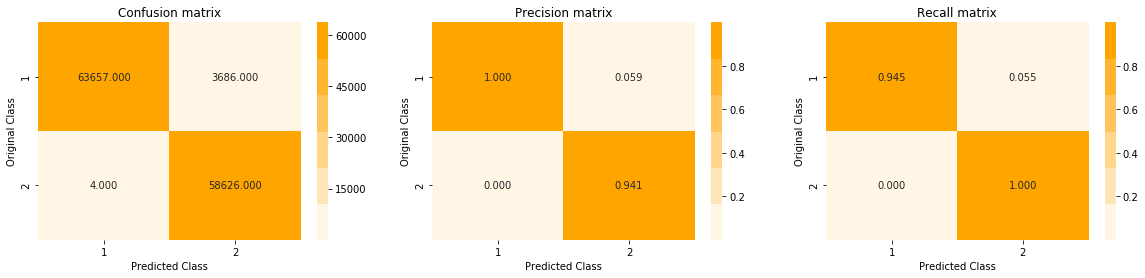

Test confusion_matrix


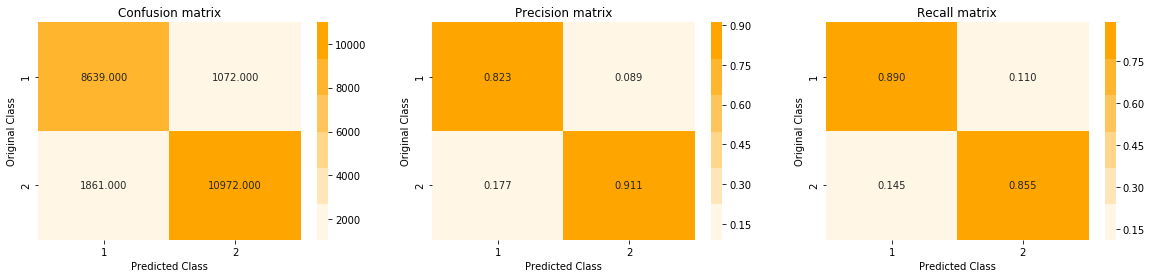

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- This is so far the best model we have 
- after doing some class balance we have got pretty good auc , f1 score and recall also
- now model not confused as previous on class 1 and class 0 

## 4.7 Random Forest Hyperparameter tuning

In [ ]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='roc_auc',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.99973248 0.99975393 0.99967673 0.99971485 0.99977576]
mean train scores [0.99975202 0.99977712 0.99969827 0.99973685 0.99980598]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


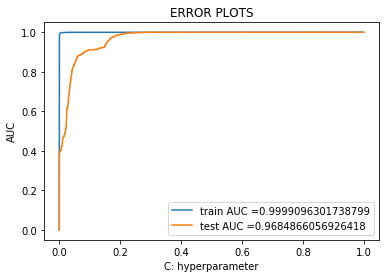

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight={0:1,1:20}, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(X_train , y_train)
     
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))


Train f1 score 0.9812059973378651
Test f1 score 0.8754566307025742
****************************************************************************************************
train recall score / detection rate 0.9995565410199556
test recall score / detection rate 0.8030078703342944


Train confusion_matrix


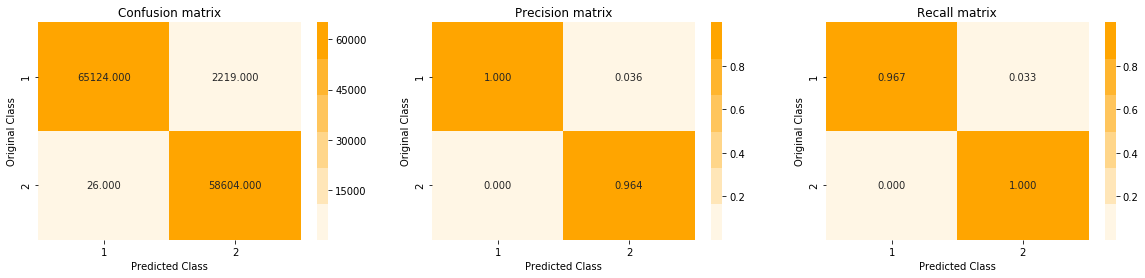

Test confusion_matrix


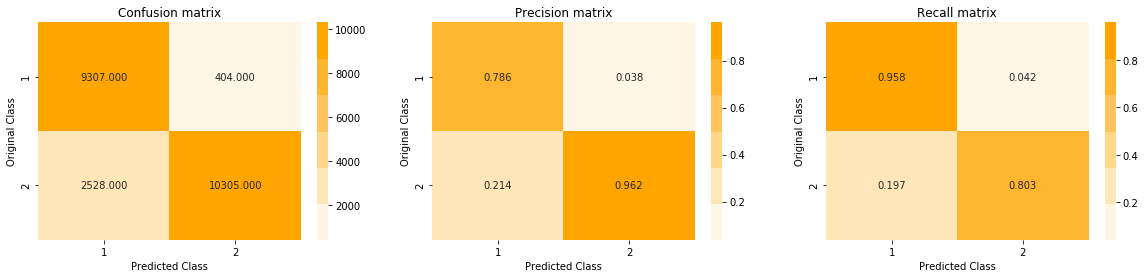

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- this model is better from other model in term of AUC , it has also good f1 and recall value but less than Decision tree.

## 4.8 XGBOOST Hyperparameter tuning

In [ ]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xgboost = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='roc_auc',random_state=25)

xgboost.fit(X_train,y_train)
print('mean test scores',xgboost.cv_results_['mean_test_score'])
print('mean train scores',xgboost.cv_results_['mean_train_score'])

mean test scores [0.99999053 0.99999079 0.9999901  0.9999907  0.99999069]
mean train scores [0.99999998 0.99999997 0.99999996 0.99999997 0.99999998]


In [ ]:
print(xgboost.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, min_samples_leaf=33,
       min_samples_split=138, missing=None, n_estimators=109, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, min_samples_leaf=33,
       min_samples_split=138, missing=None, n_estimators=109, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

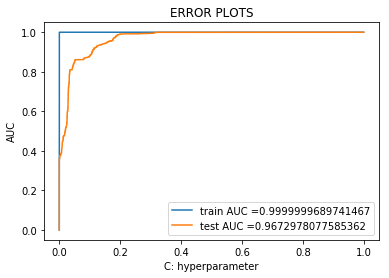

In [ ]:
from sklearn.metrics import roc_curve, auc

clf.fit(X_train , y_train)
     
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.999880615342634
Test f1 score 0.7592960544990066


In [ ]:
print('Train Detecction rate/recall',recall_score(y_train,y_train_pred))
print('Test Detecction rate/recall',recall_score(y_test,y_test_pred))

Train Detecction rate/recall 0.9999488316561488
Test Detecction rate/recall 0.6253409179459207


Train confusion_matrix


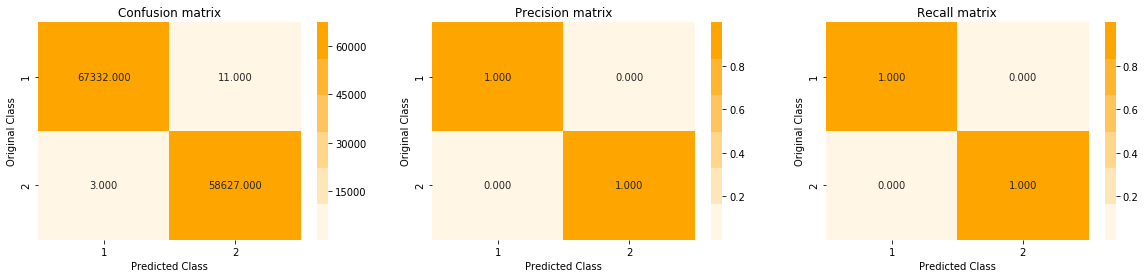

Test confusion_matrix


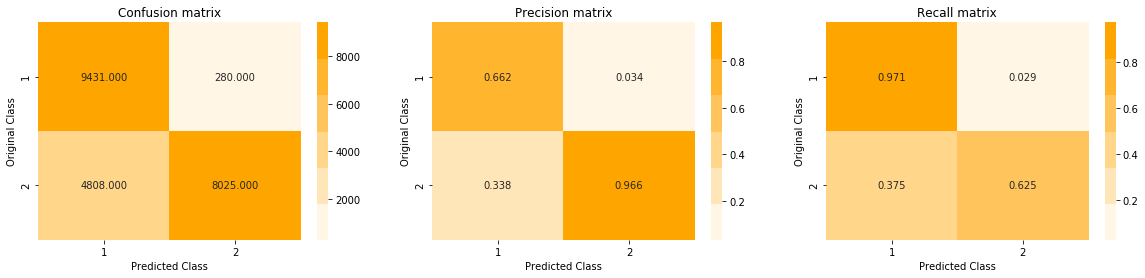

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation :
#### 1 -> class 0 and 2 -> class 1
- the xgboost model is not performed as expected
- It cant recall well on the test data

## 4.9 Basic stacking 

In [ ]:
# create base models
# borrowed idea of stacking from AAIC code snippet (from one of the case study)

from sklearn.neighbors import KNeighborsClassifier
# model 1 (KNN)
model_1 = KNeighborsClassifier(n_neighbors =99)
model_1.fit(X_train, y_train)

# model 2 (Decision tree)
model_2 = DTC(class_weight={0:.1,1:15}, criterion='gini', max_depth=100,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=500,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model_2.fit(X_train, y_train)

# model 3 (Randomforest)
model_3 = RandomForestClassifier(bootstrap=True, class_weight={0:1,1:20}, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
model_3.fit(X_train , y_train)

#model 4 (Xgboost)
model_4 = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=12, min_child_weight=1, min_samples_leaf=33,
       min_samples_split=138, missing=None, n_estimators=109, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model_4.fit(X_train , y_train)


#model 5 (naive bayes)
model_5 =MultinomialNB(alpha = 10)
model_5.fit(X_train,y_train)

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [ ]:
# create a meta classfier (we have logstic regression)
# have not done hyperparam tuning because this code snippet only taking around 3 hour in my box  
# so just taking the best param from the previous LR model

meta_clsf = LogisticRegression(C=0.01)
# stack all the 5 model and pass the out put of those model to the meta classfier
stack_clf = StackingClassifier(classifiers = [model_1,model_2,model_3,model_4,model_5], meta_classifier = meta_clsf)
stack_clf.fit(X_train, y_train) 

StackingClassifier(average_probas=False,
          classifiers=[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=99, p=2,
           weights='uniform'), DecisionTreeClassifier(class_weight={0: 0.1, 1: 15}, criterion='gini',
            max_depth=100, max_features=None, m...d=None,
       silent=True, subsample=1), MultinomialNB(alpha=10, class_prior=None, fit_prior=True)],
          meta_classifier=LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)

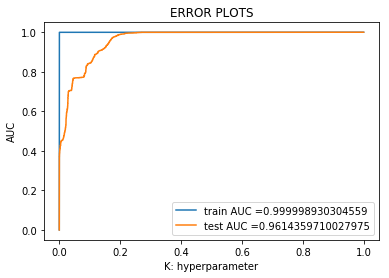

In [ ]:
# get the auc score and plotting
train_fpr, train_tpr, thresholds = roc_curve(y_train, stack_clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, stack_clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = stack_clf.predict(X_train)
y_test_pred = stack_clf.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9994799259960271
Test f1 score 0.7843464552325313
train recall score / detection rate 0.9997441582807437
test recall score / detection rate 0.6590820540793267


Train confusion_matrix


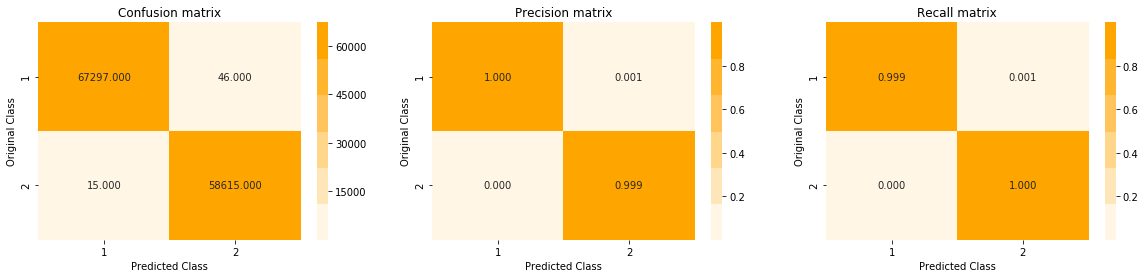

Test confusion_matrix


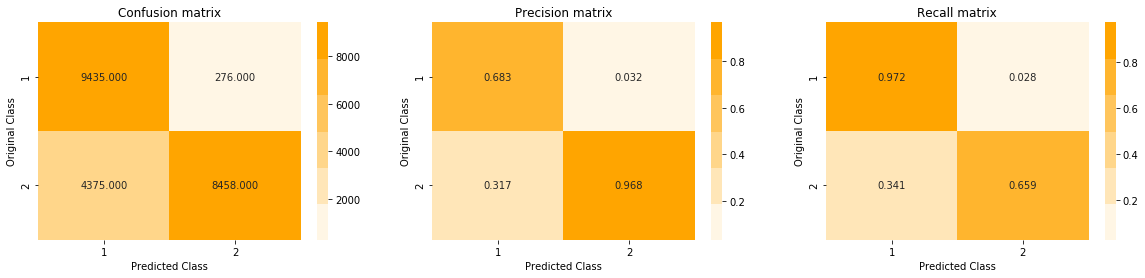

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

### Observation:
- the above code snippet will take time
- the above model is normal staking model where i have taken all the model and stacked them
- pass the output of all model to the meta classfier 
- here also we got a nice auc score but f1 score and recall not at that good

##  4.10 Customized Stacking

#### Method:
- take the wole data set 
- define train and test data
- divide the train data into two part: data 1 and data 2 (here we take 50-50 % )
- create m sample from the train data and fitted with the base learner (xgboost)
- now predict by passing the data2 to each sample that we are fitted
- now train the meta classifier with the given predicted value and target value of data 2 (meta clf : logistic regression)
- now use the fitted meta classifier and predict the test data


In [ ]:
# create 2 dataset from train data
data1 = train_data[:65000]
data2 = train_data[65000:]

In [ ]:
# This function is for the preprocessing :- it will craete sample datapoints from the train data
# here is a good source to learn bootstrap sampling : https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

def preprocessing(train_x ,cv_data, test_data):
    y_train = train_x['label']
    y_cv = cv_data['label']
    y_test = test_data['label']
    
    # one hot encoding of protocol, service and flag feature
    prototype_vectorizer = CountVectorizer()
    train_protocol_type_encoding = prototype_vectorizer.fit_transform(train_x['protocol_type'])
    cv_protocol_type_encoding = prototype_vectorizer.transform(cv_data['protocol_type'])
    test_protocol_type_encoding = prototype_vectorizer.transform(test_data['protocol_type'])
    
    service_encode = CountVectorizer()
    train_service_encoding = service_encode.fit_transform(train_x['service'])
    cv_service_encoding = service_encode.transform((cv_data['service']))
    test_service_encoding = service_encode.transform((test_data['service']))
    
    flag_encoding = CountVectorizer()
    train_flag_encoding = flag_encoding.fit_transform(train_x['flag'])
    cv_flag_encoding = flag_encoding.transform(cv_data['flag'])
    test_flag_encoding = flag_encoding.transform(test_data['flag'])
    
    # removing correlated features/irrelevant features from train and test data 
    X_train_after_FS = train_x.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)
    X_cv_after_FS = cv_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)
    X_test_after_FS = test_data.drop(['srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'dst_host_srv_serror_rate', 'num_root', 'dst_host_serror_rate', 'srv_rerror_rate'],axis = 1)
    
    
    # removing featues which are adding less value , by looking at the RFECV
    X_train_after_FS = X_train_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)
    X_cv_after_FS = X_cv_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1) 
    X_test_after_FS = X_test_after_FS.drop(['srv_diff_host_rate', 'num_file_creations' , 'num_failed_logins','num_access_files','root_shell','num_shells','su_attempted','urgent','land', 'num_outbound_cmds','attack'],axis = 1)
    
    # removing label, attck,protocol_type,service,flag column from train and test data
    X_train_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)
    X_cv_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)
    X_test_after_FS.drop(['protocol_type','service','flag','label'], axis=1, inplace=True)
    
    
    # take protocol_type one_hot_encoding vector and service one_hot_encoding vector and merge them using hstack
    train_protocol_service_encoding = hstack((train_protocol_type_encoding, train_service_encoding))
    cv_protocol_service_encoding = hstack((cv_protocol_type_encoding,  cv_service_encoding))
    test_protocol_service_encoding = hstack((test_protocol_type_encoding,  test_service_encoding))

    # take train_proto_services_encoding vector and flag one_hot_encoding vector and merge them using hstack
    train_protocol_service_flag_encoding = hstack((train_protocol_service_encoding, train_flag_encoding))
    cv_protocol_service_flag_encoding  = hstack((cv_protocol_service_encoding ,cv_flag_encoding))
    test_protocol_service_flag_encoding  = hstack((test_protocol_service_encoding ,test_flag_encoding))
        
    
    # merging the categorical onehot encoded feature and numerical feature
    X_train = hstack((train_protocol_service_flag_encoding , X_train_after_FS))
    cv_test = hstack((cv_protocol_service_flag_encoding , X_cv_after_FS))
    X_test = hstack((test_protocol_service_flag_encoding , X_test_after_FS))
    
    #returning X_train ,y_train, X_test , y_test
    return X_train ,y_train,cv_test,y_cv, X_test , y_test

In [ ]:
X_train ,y_train,cv_test,y_cv, X_test , y_test = preprocessing(data1 ,data2,test_data)

In [ ]:
# print data1 and data2 and test data
print(X_train.shape ,y_train.shape)
print(cv_test.shape ,y_cv.shape)
print(X_test.shape , y_test.shape)

(65000, 102) (65000,)
(60973, 102) (60973,)
(22544, 102) (22544,)


In [ ]:
# this function will shuffle the data and will resample
def shuf_sample(d , y ,num_data_points): 
    d , y = shuffle(d, y)
    t_x ,y_x = resample(d ,y, replace=True ,n_samples = num_data_points ,random_state=43)
    return t_x , y_x

In [ ]:
# refer :  https://www.youtube.com/watch?v=enEerl0feRo
# http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier/

# this function will take each sample and will going to fit with Xgboost classifier 
# also predict the the 
def compute_base_learner(train_x,train_y,cv_test,X_test , num_samples ,num_data_points):
    predict_cv = []
    predict_test = []
    for i in range(1,num_samples):
        print("iteration",i)
        train_x , train_y = shuf_sample(X_train ,y_train ,num_data_points)
        clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
            colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
           max_depth=12, min_child_weight=1, min_samples_leaf=33,
           min_samples_split=138, missing=None, n_estimators=109, n_jobs=-1,
           nthread=None, objective='binary:logistic', random_state=25,
           reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=True, subsample=1)
        clf = clf.fit(train_x , train_y)
    
        pred_cv = clf.predict_proba(cv_test)
        pred_test = clf.predict_proba(X_test)
    
        predict_cv.append(pred_cv)
        predict_test.append(pred_test)
    return predict_cv , predict_test   

In [ ]:
def meta_classifier(predict_cv , predict_test , y_cv):
    prediction_cv = np.column_stack(predict_cv)
    prediction_test = np.column_stack(predict_test)
    meta_clf = LogisticRegression(C = 0.01)
    meta_clf = meta_clf.fit(prediction_cv , y_cv)   
    return meta_clf, prediction_test

### with 1000 sample

In [ ]:
from datetime import datetime
start = datetime.now()
predict_cv , predict_test = compute_base_learner(X_train ,y_train,cv_test,X_test , 1001 ,1000)
print("Time taken to run this cell :", datetime.now() - start)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

In [ ]:
meta_clf ,prediction_test = meta_classifier(predict_cv , predict_test , y_cv)

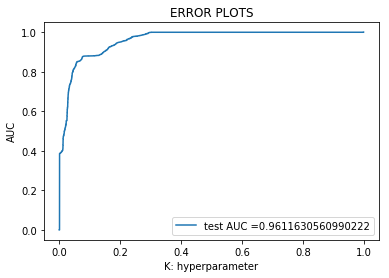

In [ ]:
# get the auc score and plotting

test_fpr, test_tpr, thresholds = roc_curve(y_test, meta_clf.predict_proba(prediction_test)[:,1]) 

plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")

plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_test_pred = meta_clf.predict(prediction_test)

print('Test f1 score',f1_score(y_test,y_test_pred))

print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Test f1 score 0.7845882789317508
test recall score / detection rate 0.6593158263851009


### with 1500 sample

In [ ]:
from datetime import datetime
start = datetime.now()
predict_cv , predict_test = compute_base_learner(X_train,y_train,cv_test,X_test , 1501 ,1500)
print("Time taken to run this cell :", datetime.now() - start)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

iteration 1168
iteration 1169
iteration 1170
iteration 1171
iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 

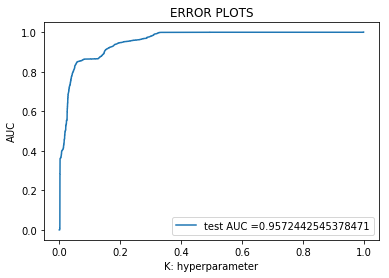

In [ ]:
# get the auc score and plotting
meta_clf ,prediction_test = meta_classifier(predict_cv , predict_test , y_cv)
test_fpr, test_tpr, thresholds = roc_curve(y_test, meta_clf.predict_proba(prediction_test)[:,1]) 

plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")

plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_test_pred = meta_clf.predict(prediction_test)

print('Test f1 score',f1_score(y_test,y_test_pred))

print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Test f1 score 0.7895077122009792
test recall score / detection rate 0.666095223252552


### with 2000 sample

In [ ]:
from datetime import datetime
start = datetime.now()
predict_cv , predict_test = compute_base_learner(X_train,y_train,cv_test,X_test , 2001 ,2000)
print("Time taken to run this cell :", datetime.now() - start)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

iteration 1168
iteration 1169
iteration 1170
iteration 1171
iteration 1172
iteration 1173
iteration 1174
iteration 1175
iteration 1176
iteration 1177
iteration 1178
iteration 1179
iteration 1180
iteration 1181
iteration 1182
iteration 1183
iteration 1184
iteration 1185
iteration 1186
iteration 1187
iteration 1188
iteration 1189
iteration 1190
iteration 1191
iteration 1192
iteration 1193
iteration 1194
iteration 1195
iteration 1196
iteration 1197
iteration 1198
iteration 1199
iteration 1200
iteration 1201
iteration 1202
iteration 1203
iteration 1204
iteration 1205
iteration 1206
iteration 1207
iteration 1208
iteration 1209
iteration 1210
iteration 1211
iteration 1212
iteration 1213
iteration 1214
iteration 1215
iteration 1216
iteration 1217
iteration 1218
iteration 1219
iteration 1220
iteration 1221
iteration 1222
iteration 1223
iteration 1224
iteration 1225
iteration 1226
iteration 1227
iteration 1228
iteration 1229
iteration 1230
iteration 1231
iteration 1232
iteration 1233
iteration 

iteration 1715
iteration 1716
iteration 1717
iteration 1718
iteration 1719
iteration 1720
iteration 1721
iteration 1722
iteration 1723
iteration 1724
iteration 1725
iteration 1726
iteration 1727
iteration 1728
iteration 1729
iteration 1730
iteration 1731
iteration 1732
iteration 1733
iteration 1734
iteration 1735
iteration 1736
iteration 1737
iteration 1738
iteration 1739
iteration 1740
iteration 1741
iteration 1742
iteration 1743
iteration 1744
iteration 1745
iteration 1746
iteration 1747
iteration 1748
iteration 1749
iteration 1750
iteration 1751
iteration 1752
iteration 1753
iteration 1754
iteration 1755
iteration 1756
iteration 1757
iteration 1758
iteration 1759
iteration 1760
iteration 1761
iteration 1762
iteration 1763
iteration 1764
iteration 1765
iteration 1766
iteration 1767
iteration 1768
iteration 1769
iteration 1770
iteration 1771
iteration 1772
iteration 1773
iteration 1774
iteration 1775
iteration 1776
iteration 1777
iteration 1778
iteration 1779
iteration 1780
iteration 

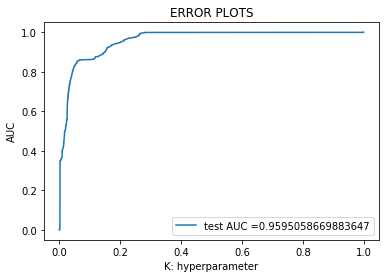

In [ ]:
# get the auc score and plotting
meta_clf ,prediction_test = meta_classifier(predict_cv , predict_test , y_cv)
test_fpr, test_tpr, thresholds = roc_curve(y_test, meta_clf.predict_proba(prediction_test)[:,1]) 

plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")

plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_test_pred = meta_clf.predict(prediction_test)

print('Test f1 score',f1_score(y_test,y_test_pred))

print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Test f1 score 0.7801108059034406
test recall score / detection rate 0.6528481259253487


### 10000 data point and 100 samples

In [ ]:
from datetime import datetime
start = datetime.now()
predict_cv , predict_test = compute_base_learner(X_train,y_train,cv_test,X_test , 1001 ,10000)
print("Time taken to run this cell :", datetime.now() - start)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

iteration 594
iteration 595
iteration 596
iteration 597
iteration 598
iteration 599
iteration 600
iteration 601
iteration 602
iteration 603
iteration 604
iteration 605
iteration 606
iteration 607
iteration 608
iteration 609
iteration 610
iteration 611
iteration 612
iteration 613
iteration 614
iteration 615
iteration 616
iteration 617
iteration 618
iteration 619
iteration 620
iteration 621
iteration 622
iteration 623
iteration 624
iteration 625
iteration 626
iteration 627
iteration 628
iteration 629
iteration 630
iteration 631
iteration 632
iteration 633
iteration 634
iteration 635
iteration 636
iteration 637
iteration 638
iteration 639
iteration 640
iteration 641
iteration 642
iteration 643
iteration 644
iteration 645
iteration 646
iteration 647
iteration 648
iteration 649
iteration 650
iteration 651
iteration 652
iteration 653
iteration 654
iteration 655
iteration 656
iteration 657
iteration 658
iteration 659
iteration 660
iteration 661
iteration 662
iteration 663
iteration 664
iterat

In [ ]:
# get the auc score and plotting
meta_clf , prediction_test = meta_classifier(predict_cv , predict_test , y_cv)


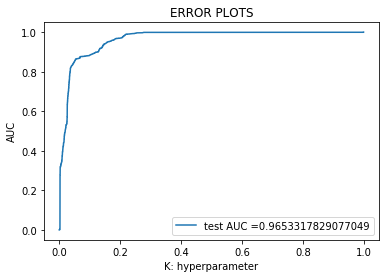

In [ ]:
test_fpr, test_tpr, thresholds = roc_curve(y_test, meta_clf.predict_proba(prediction_test)[:,1]) 

plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")

plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_test_pred = meta_clf.predict(prediction_test)

print('Test f1 score',f1_score(y_test,y_test_pred))

print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Test f1 score 0.7667231957791597
test recall score / detection rate 0.6341463414634146


## 4.11 Feature Engineering
lets add two new feature
- add 2 most important feature as per feature selection
- use square of an important feature

In [ ]:
train_data['same_srv_rate_src_bytes'] = train_data['same_srv_rate']+ train_data['src_bytes']
test_data['same_srv_rate_src_bytes'] =test_data['same_srv_rate']+ test_data['src_bytes']

In [ ]:
train_data['same_srv_rate_sqr'] = train_data['same_srv_rate'] ** 2
test_data['same_srv_rate_sqr'] =test_data['same_srv_rate'] ** 2

- Please run the cell after feature selection section upto standardization

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,label,same_srv_rate_src_bytes,same_srv_rate_sqr
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0,492.00,1.0000
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0,146.08,0.0064
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1,0.05,0.0025
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0,233.00,1.0000
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0,200.00,1.0000


In [ ]:
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='roc_auc',random_state=25)

rf_random.fit(X_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.99978088 0.99980386 0.99974889 0.99977604 0.99983323]
mean train scores [0.99980049 0.9998284  0.99976008 0.9997991  0.99986029]


In [ ]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


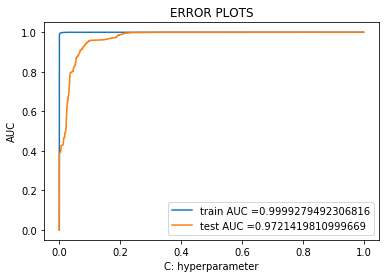

In [ ]:
clf = RandomForestClassifier(bootstrap=True, class_weight={0:1,1:20}, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(X_train , y_train)
     
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

In [ ]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))
print("*"*100)
print("train recall score / detection rate",recall_score(y_train,y_train_pred))
print("test recall score / detection rate",recall_score(y_test,y_test_pred))

Train f1 score 0.9871886660545977
Test f1 score 0.8739645724480694
****************************************************************************************************
train recall score / detection rate 0.9995053726761044
test recall score / detection rate 0.8016052364996493


Train confusion_matrix


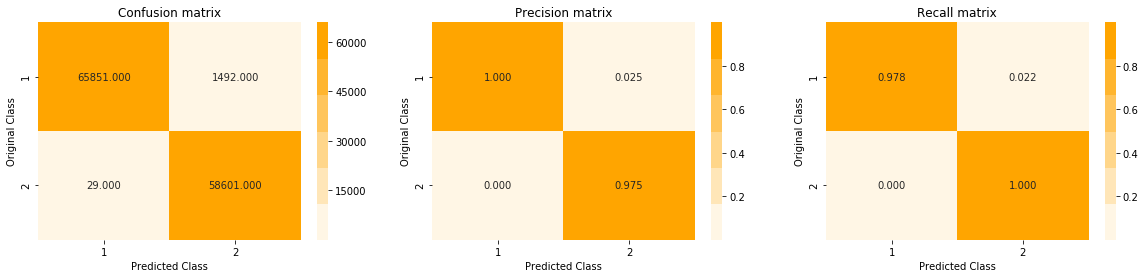

Test confusion_matrix


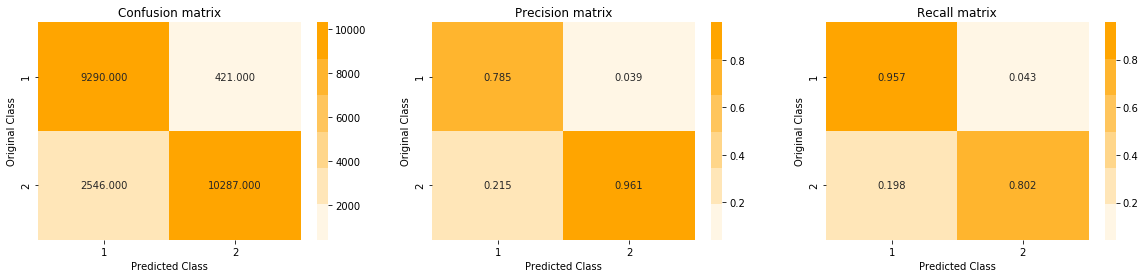

In [ ]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

#### Observation:
    - this model is giving highest auc value better than our previous random forest model

### Understanding the whole model building section breifly
- Merge all the encoded categorical and numerical features 
- build a base line model in this case we have taken Naive bayes (we can take knn also)
- By looking at the naive bayes model after hyperparameter tuning the model seems to overfit(gap in train and test score)
- to overcome from this problem we select features by recusive feature elemination (please read the "understanding feature selection" after 4.2 section)
- after done that remove all the feature manually from the train data and those features which are not adding value by seeing the important feature plot
- Build the model again starting with the naive bayes model 
- after feature selection we got good AUC but there were some problem like f1 score was low and confusion on the test recall , this was beacause the data set is imbalanced , so give some class weight to tackle this , and after that we got pretty good result.
- So far there are two good model Decision tree and Randomforest
- I thought Xgboost will gonna give best result but thats ok .
- tried two kind of stacking but the result were not at all good in term of f1 score and recall score.
- In the feature engineering section i have tried 2 new feature which is take the those feature which are important by our feature selection method , then add those feature and other is square a feature 
- The result of feature engineered model(trioed random forest) is great this is highest auc value i have got , but the f1 and recall score is lower than Decision tree and random forest

In [ ]:
from prettytable import PrettyTable
k = PrettyTable()
p = PrettyTable()
print('*************Before feature selection**************')
k.field_names = ["Model","Train AUC" ,"Test AUC" ,"f1 score on test data" , "recall on test data"]
k.add_row(["Naive Bayes" , .9829 , 0.8400,0.7687,.6388])
print(k)
print('*********After feature selection**************')
p.field_names = ["Model","Train AUC" ,"Test AUC" ,"f1 score on test data" , "recall on test data"]
p.add_row(["Naive Bayes" , .9863 , 0.8553,0.7734,.6452])
p.add_row(["KNN" , .999 , 0.891,0.7806,.6593])
p.add_row(["Logistic Regression" , .9928 , 0.9049,0.7264,.6032])
p.add_row(["Decision Tree" , .9998 , 0.9011,0.8820,.8549])
p.add_row(["Random Forest" , .9999 , 0.9684,0.8754,.8030])
p.add_row(["Xgboost" , .9999 , 0.9672,0.7592,.6253])
p.add_row(["Basic stacking model" , .9999 , 0.9614,0.7843,.6590])
p.add_row(["Customized stacking model" , "not computed" , 0.957,0.79,.666])
p.add_row([" RF with feature engineering" , .999 , .972 , .873, .801])
print(p)

*************Before feature selection**************
+-------------+-----------+----------+-----------------------+---------------------+
|    Model    | Train AUC | Test AUC | f1 score on test data | recall on test data |
+-------------+-----------+----------+-----------------------+---------------------+
| Naive Bayes |   0.9829  |   0.84   |         0.7687        |        0.6388       |
+-------------+-----------+----------+-----------------------+---------------------+
*********After feature selection**************
+------------------------------+--------------+----------+-----------------------+---------------------+
|            Model             |  Train AUC   | Test AUC | f1 score on test data | recall on test data |
+------------------------------+--------------+----------+-----------------------+---------------------+
|         Naive Bayes          |    0.9863    |  0.8553  |         0.7734        |        0.6452       |
|             KNN              |    0.999     |  0.891  